# Baseball Case Study:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv(r"C:\Users\mahes\Downloads\baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [8]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

According to the problem statement, the target variable 'W' is of type int64, which is a continuous value. Therefore, we'll use regression techniques to train our model.

# Exploratory Data Analysis:

In [9]:
df.shape

(30, 17)

There are 30 rows and 17 columns in the dataset.

In [10]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

ERA is a float type data and except ERA all columns are int type data.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


So,I can there is a(1)float64 vallue and (16)int value and there are no null values.

In [12]:
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

So, I can see these are number of unique values in each column.

In [13]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No missing values are present in the given dataset.

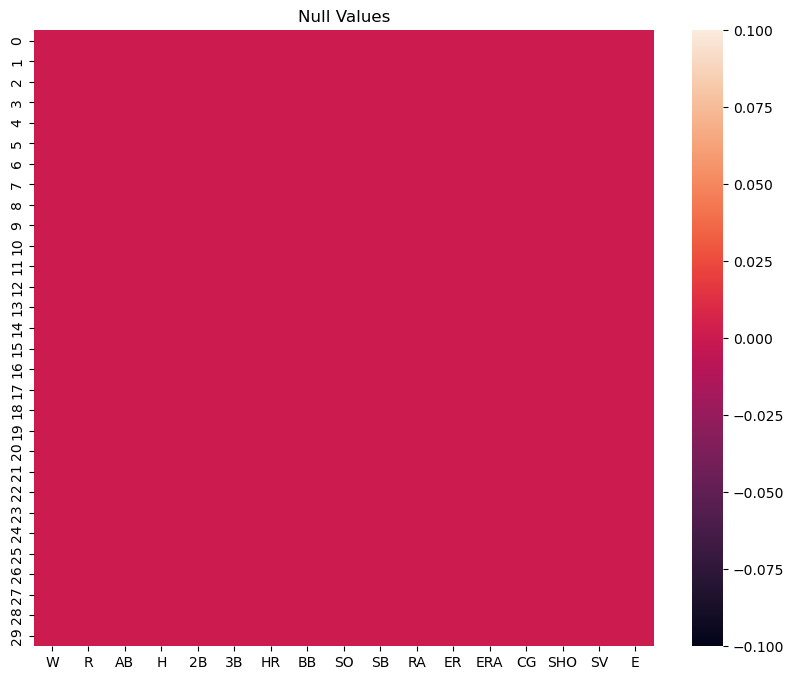

In [15]:
plt.figure(figsize=[10,8])
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

I can see in graph that there is no null values in the given dataset.

In [16]:
df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

In [17]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Upon observation, it's clear that all columns contain 30 entries, with no negative values present. Some columns have notably low values, while others contain significantly high values.

# Data Visualization:

# Univariate Analysis:

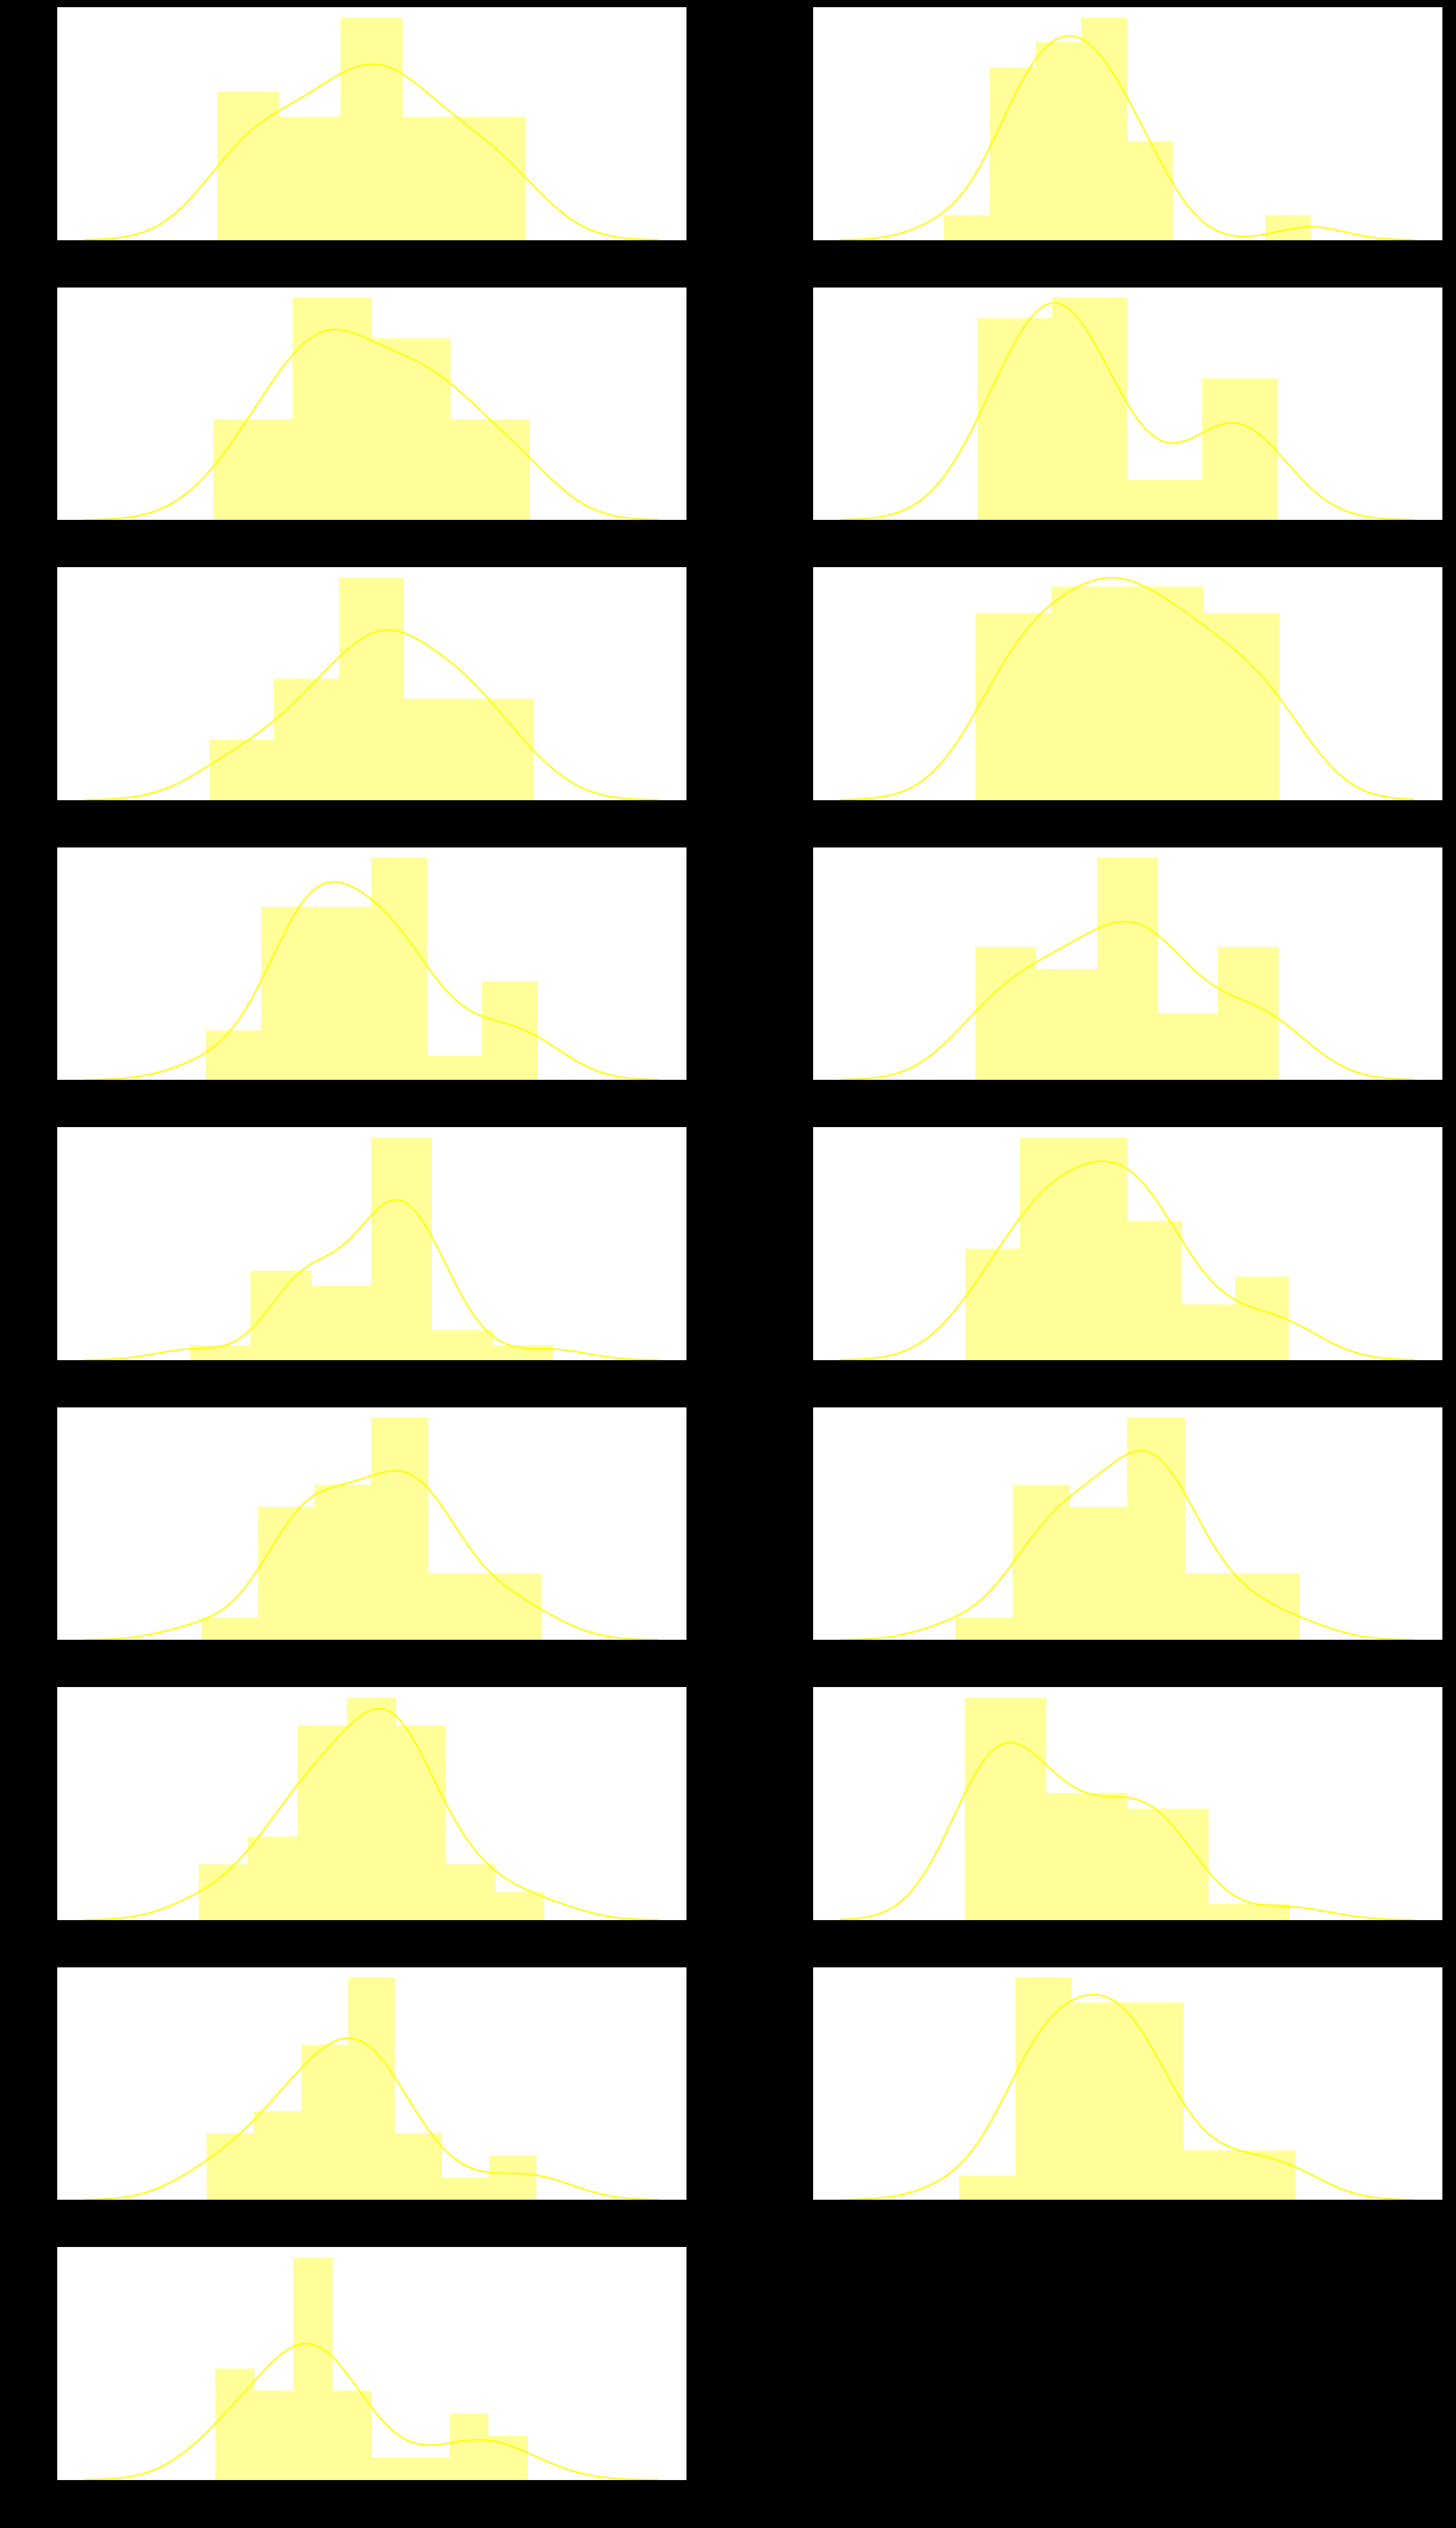

In [20]:
plt.figure(figsize = (25,50), facecolor = 'black')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'yellow')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

Almost all the columns are normally distributed.Except R,SO,CG and E.

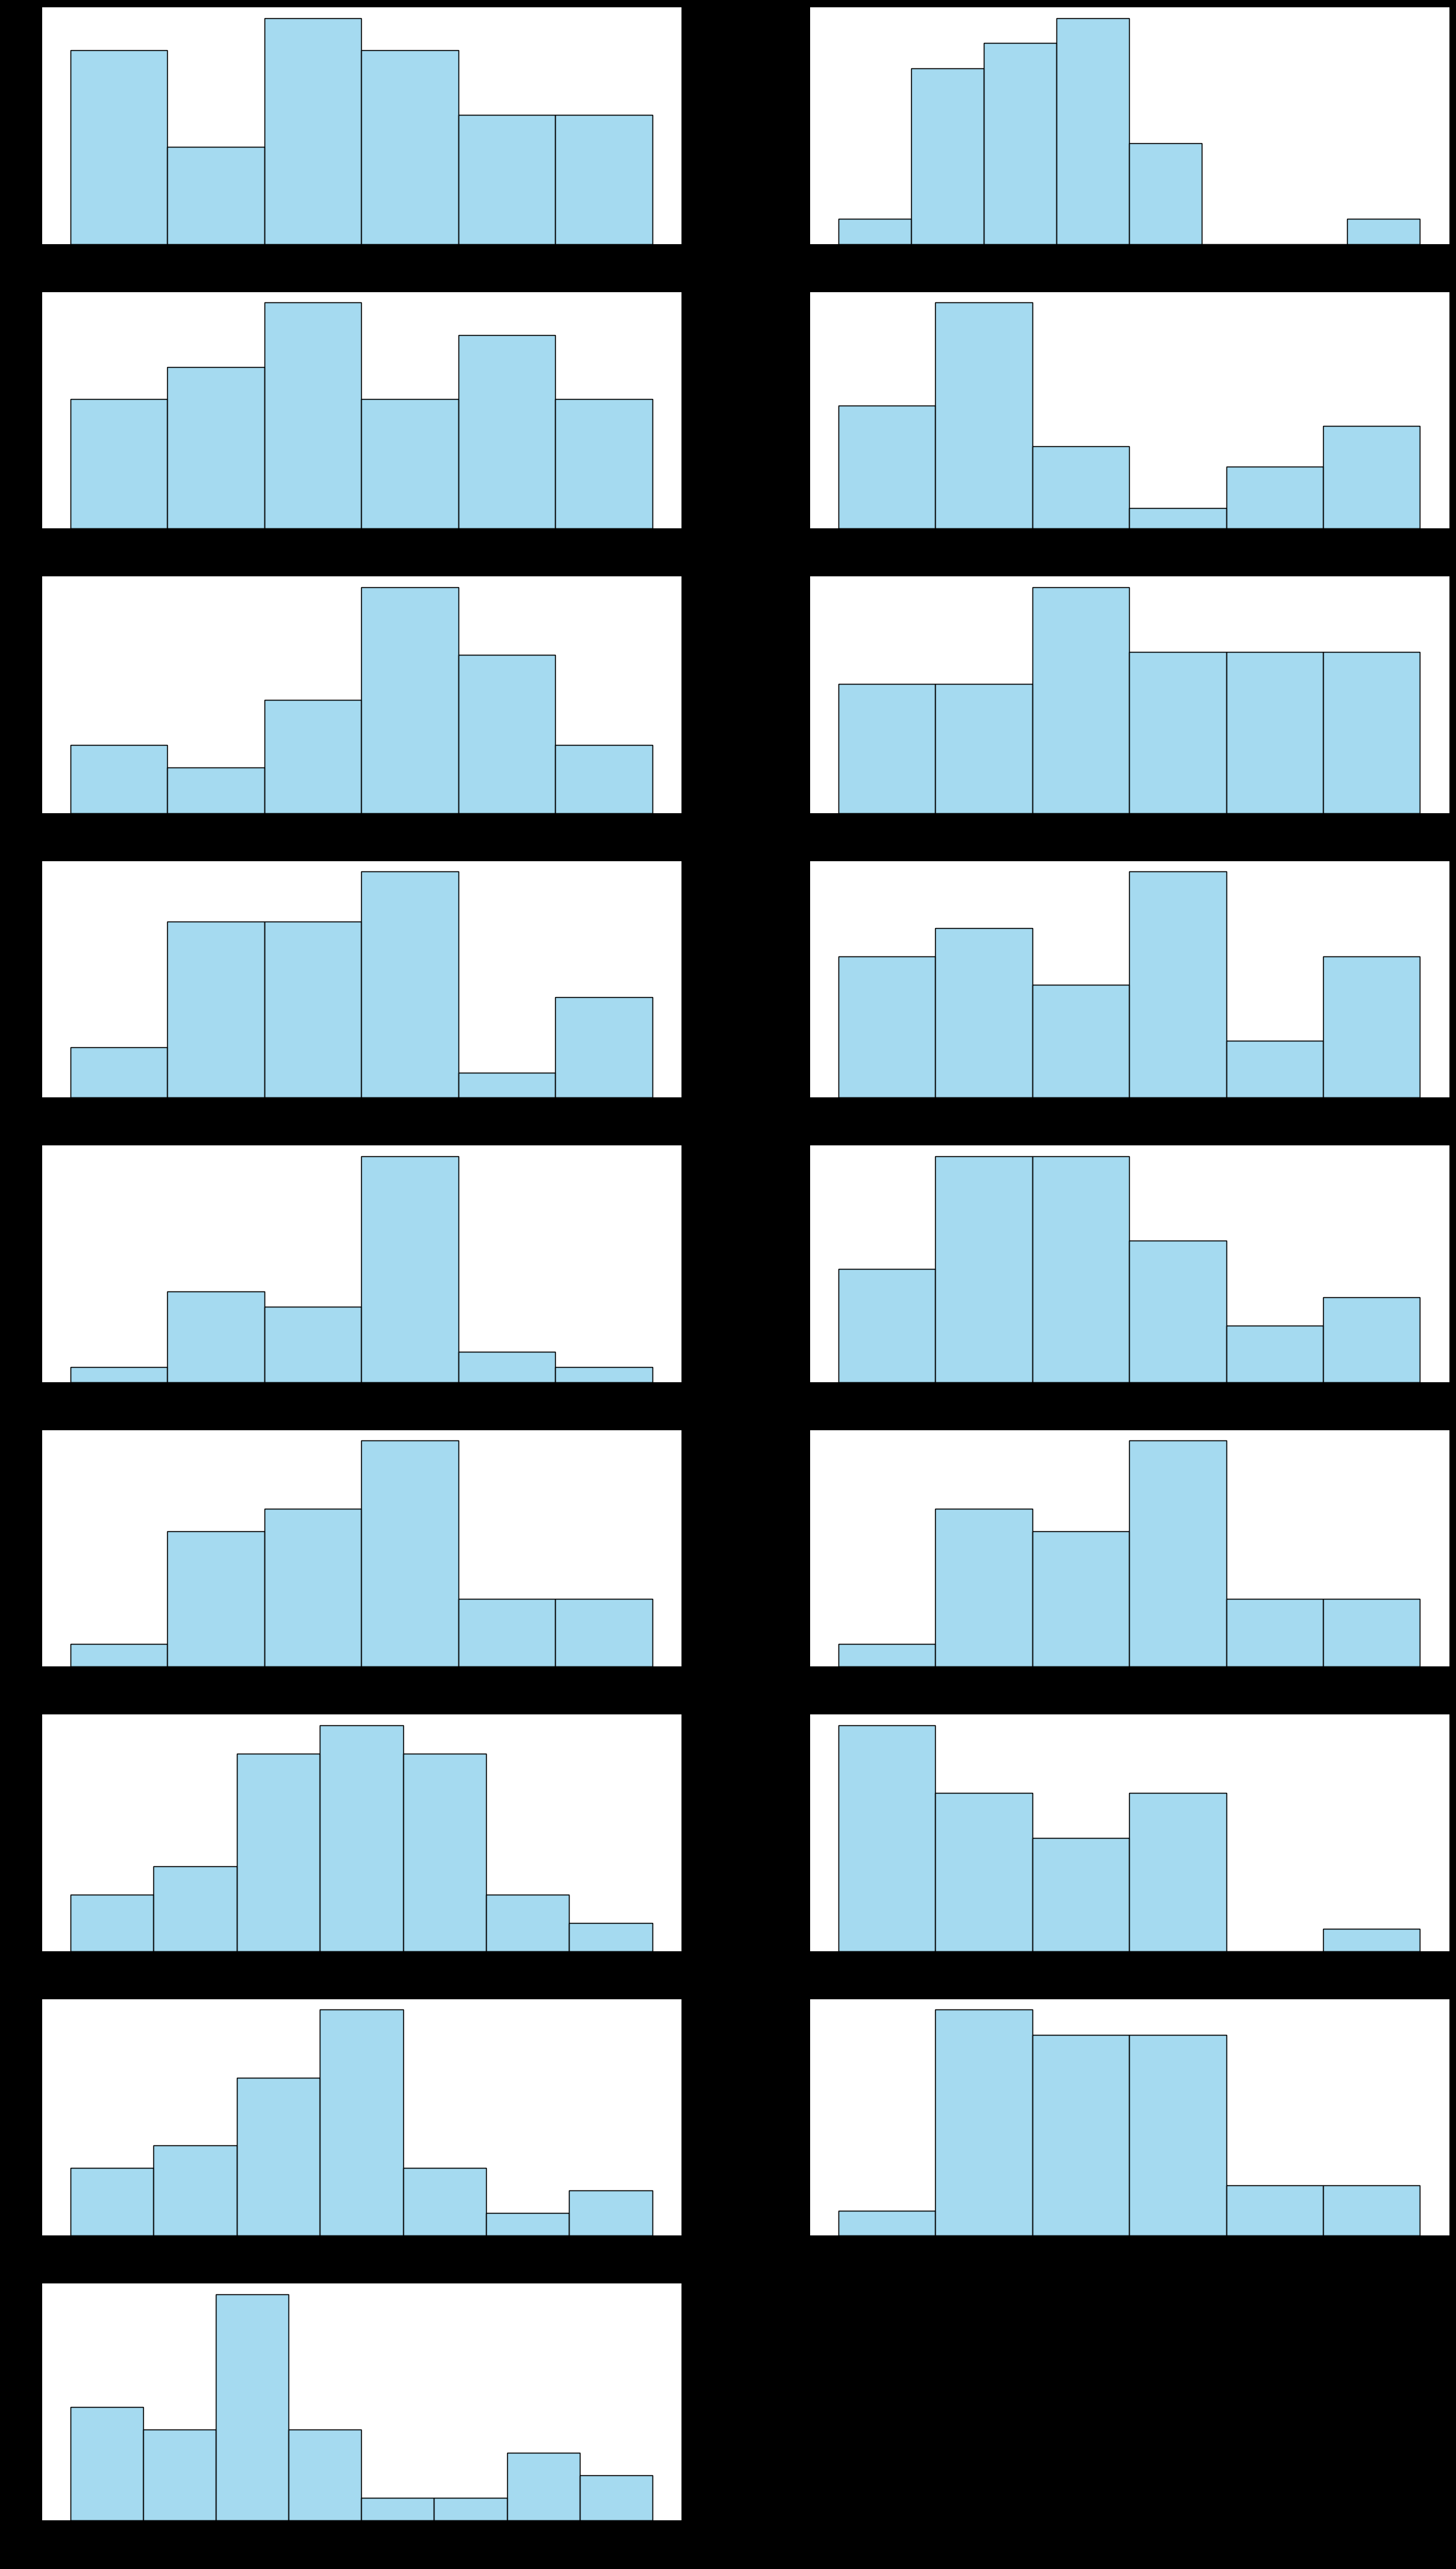

In [21]:
plt.figure(figsize = (25,50), facecolor = 'black')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.histplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

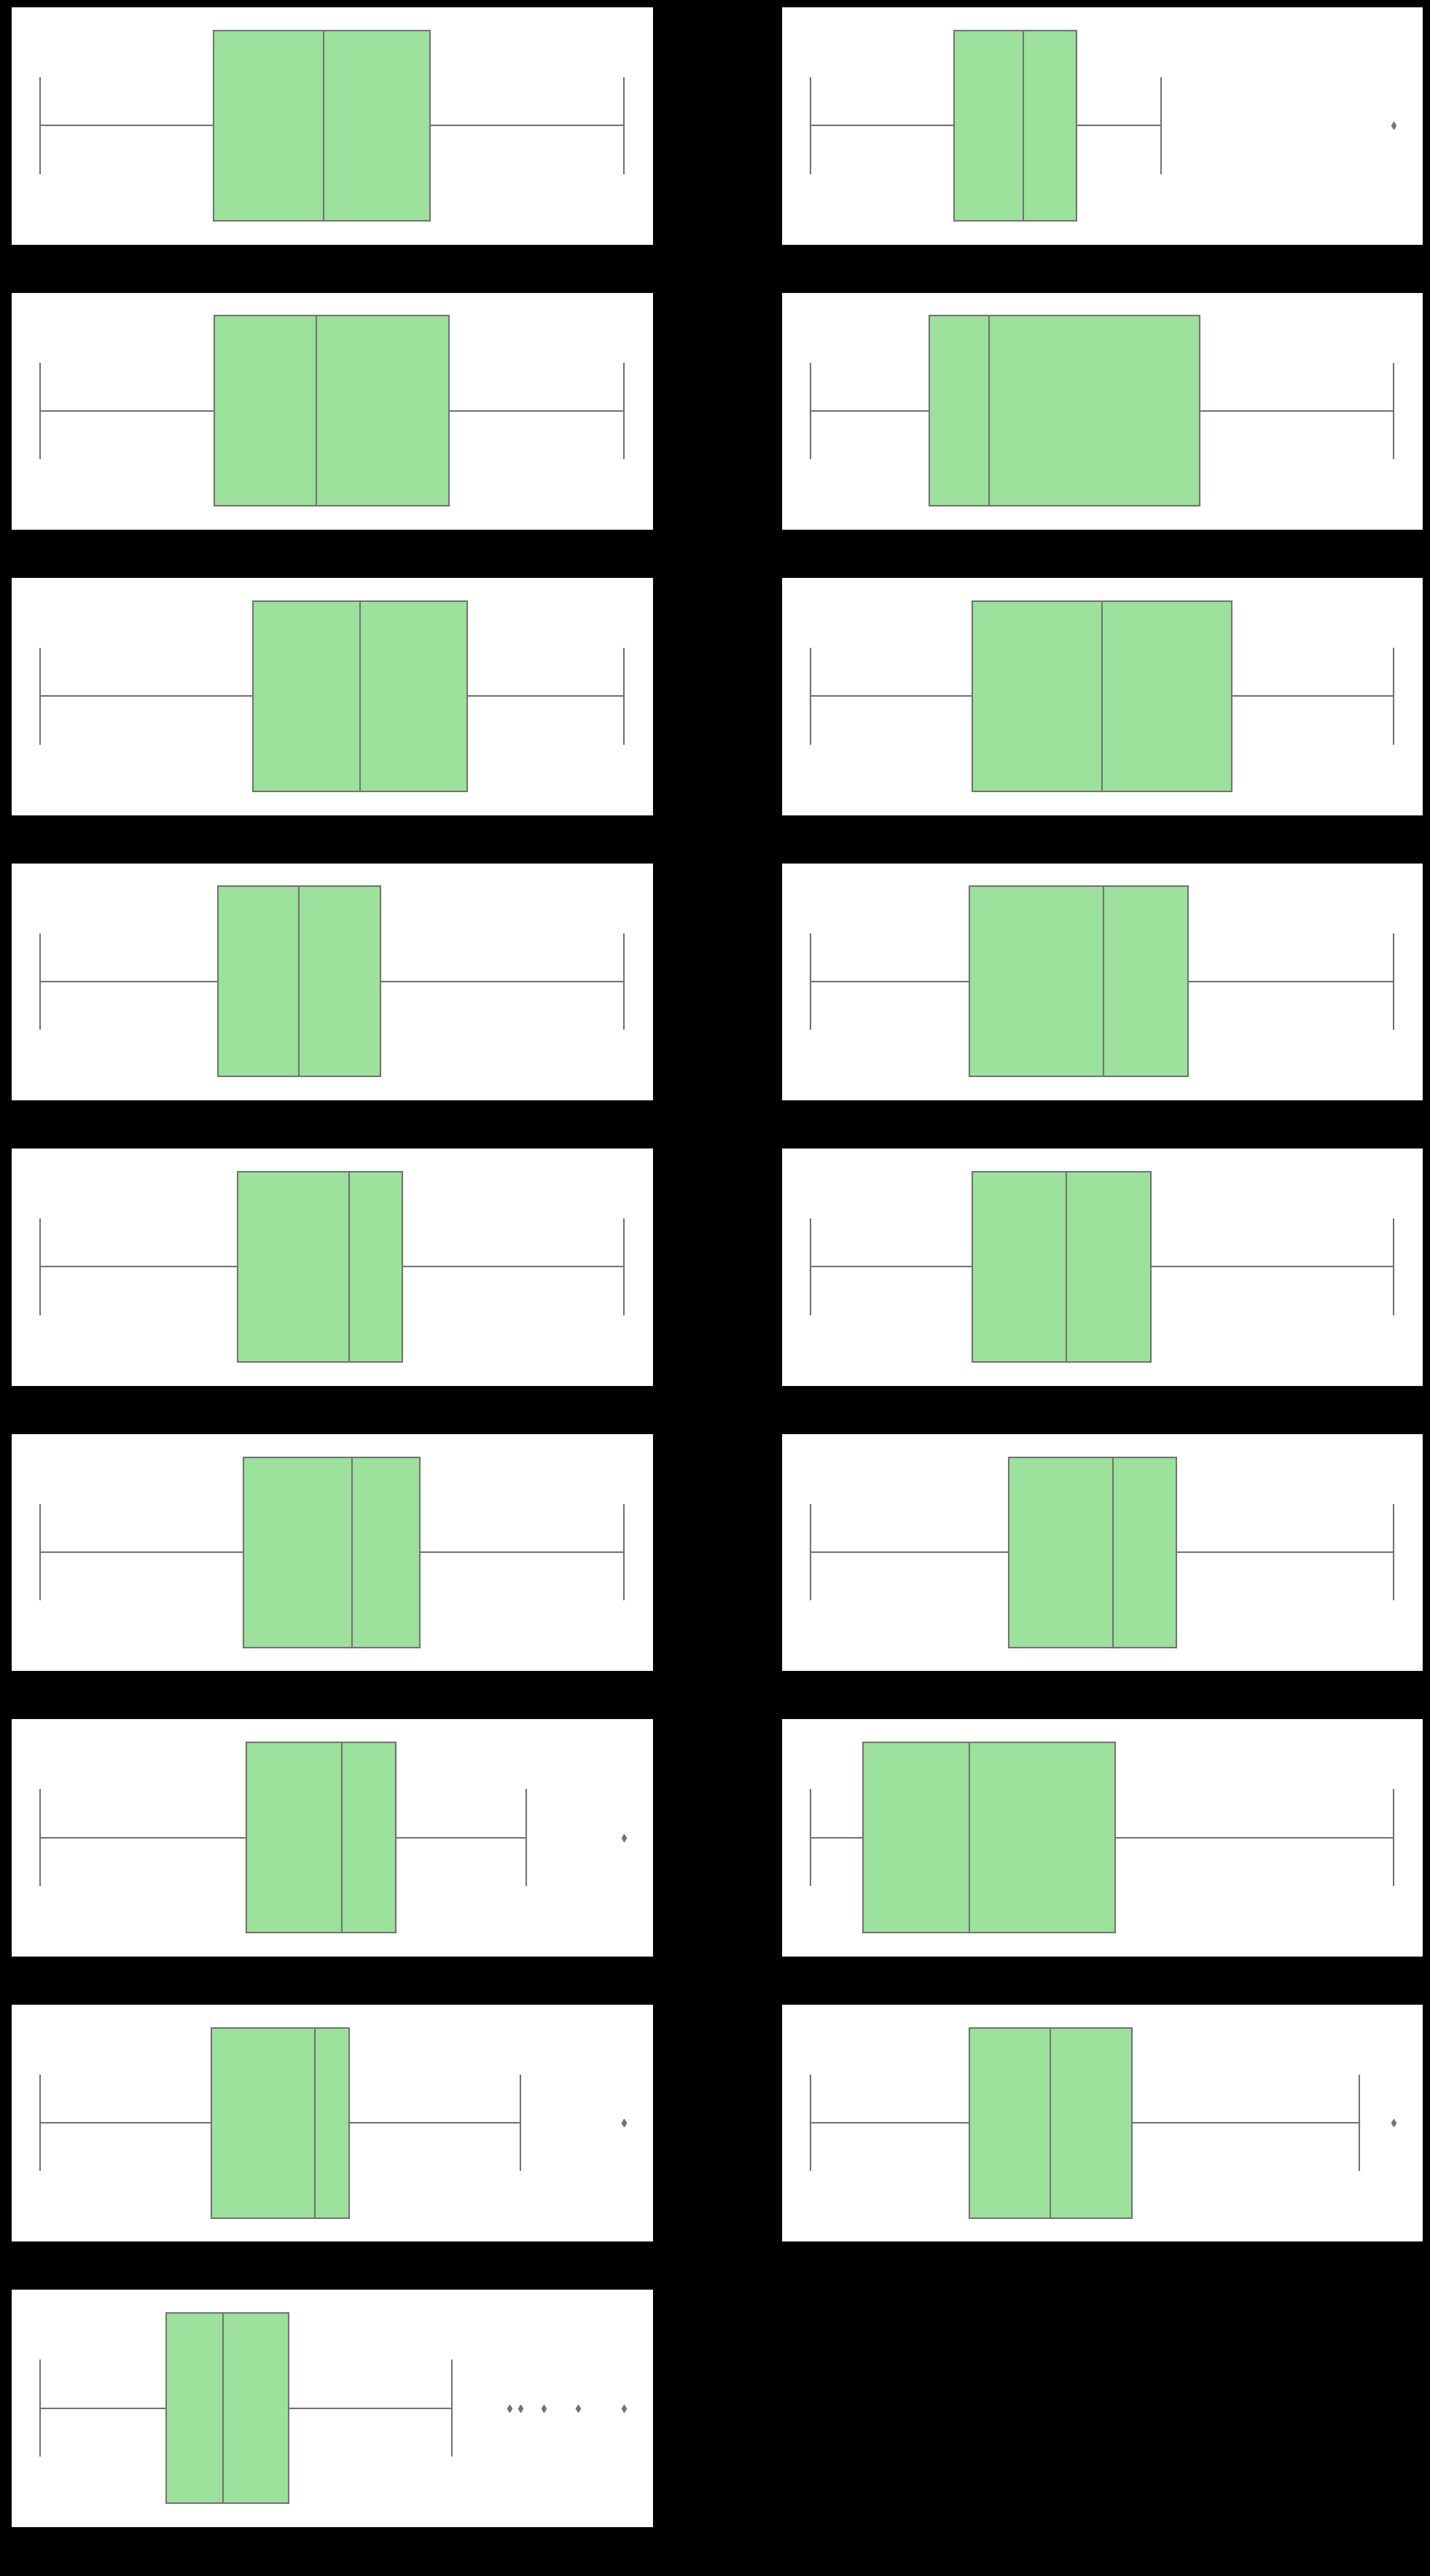

In [22]:
plt.figure(figsize = (25,50), facecolor = 'black')
plotnumber = 1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.boxplot(df[column], color = 'lightgreen')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

As shown in boxplot R,ERA,SHO,SV and E input variable is having outliers in it. So,we need remove outliers from that the input variables.

# Bivariate Analysis:

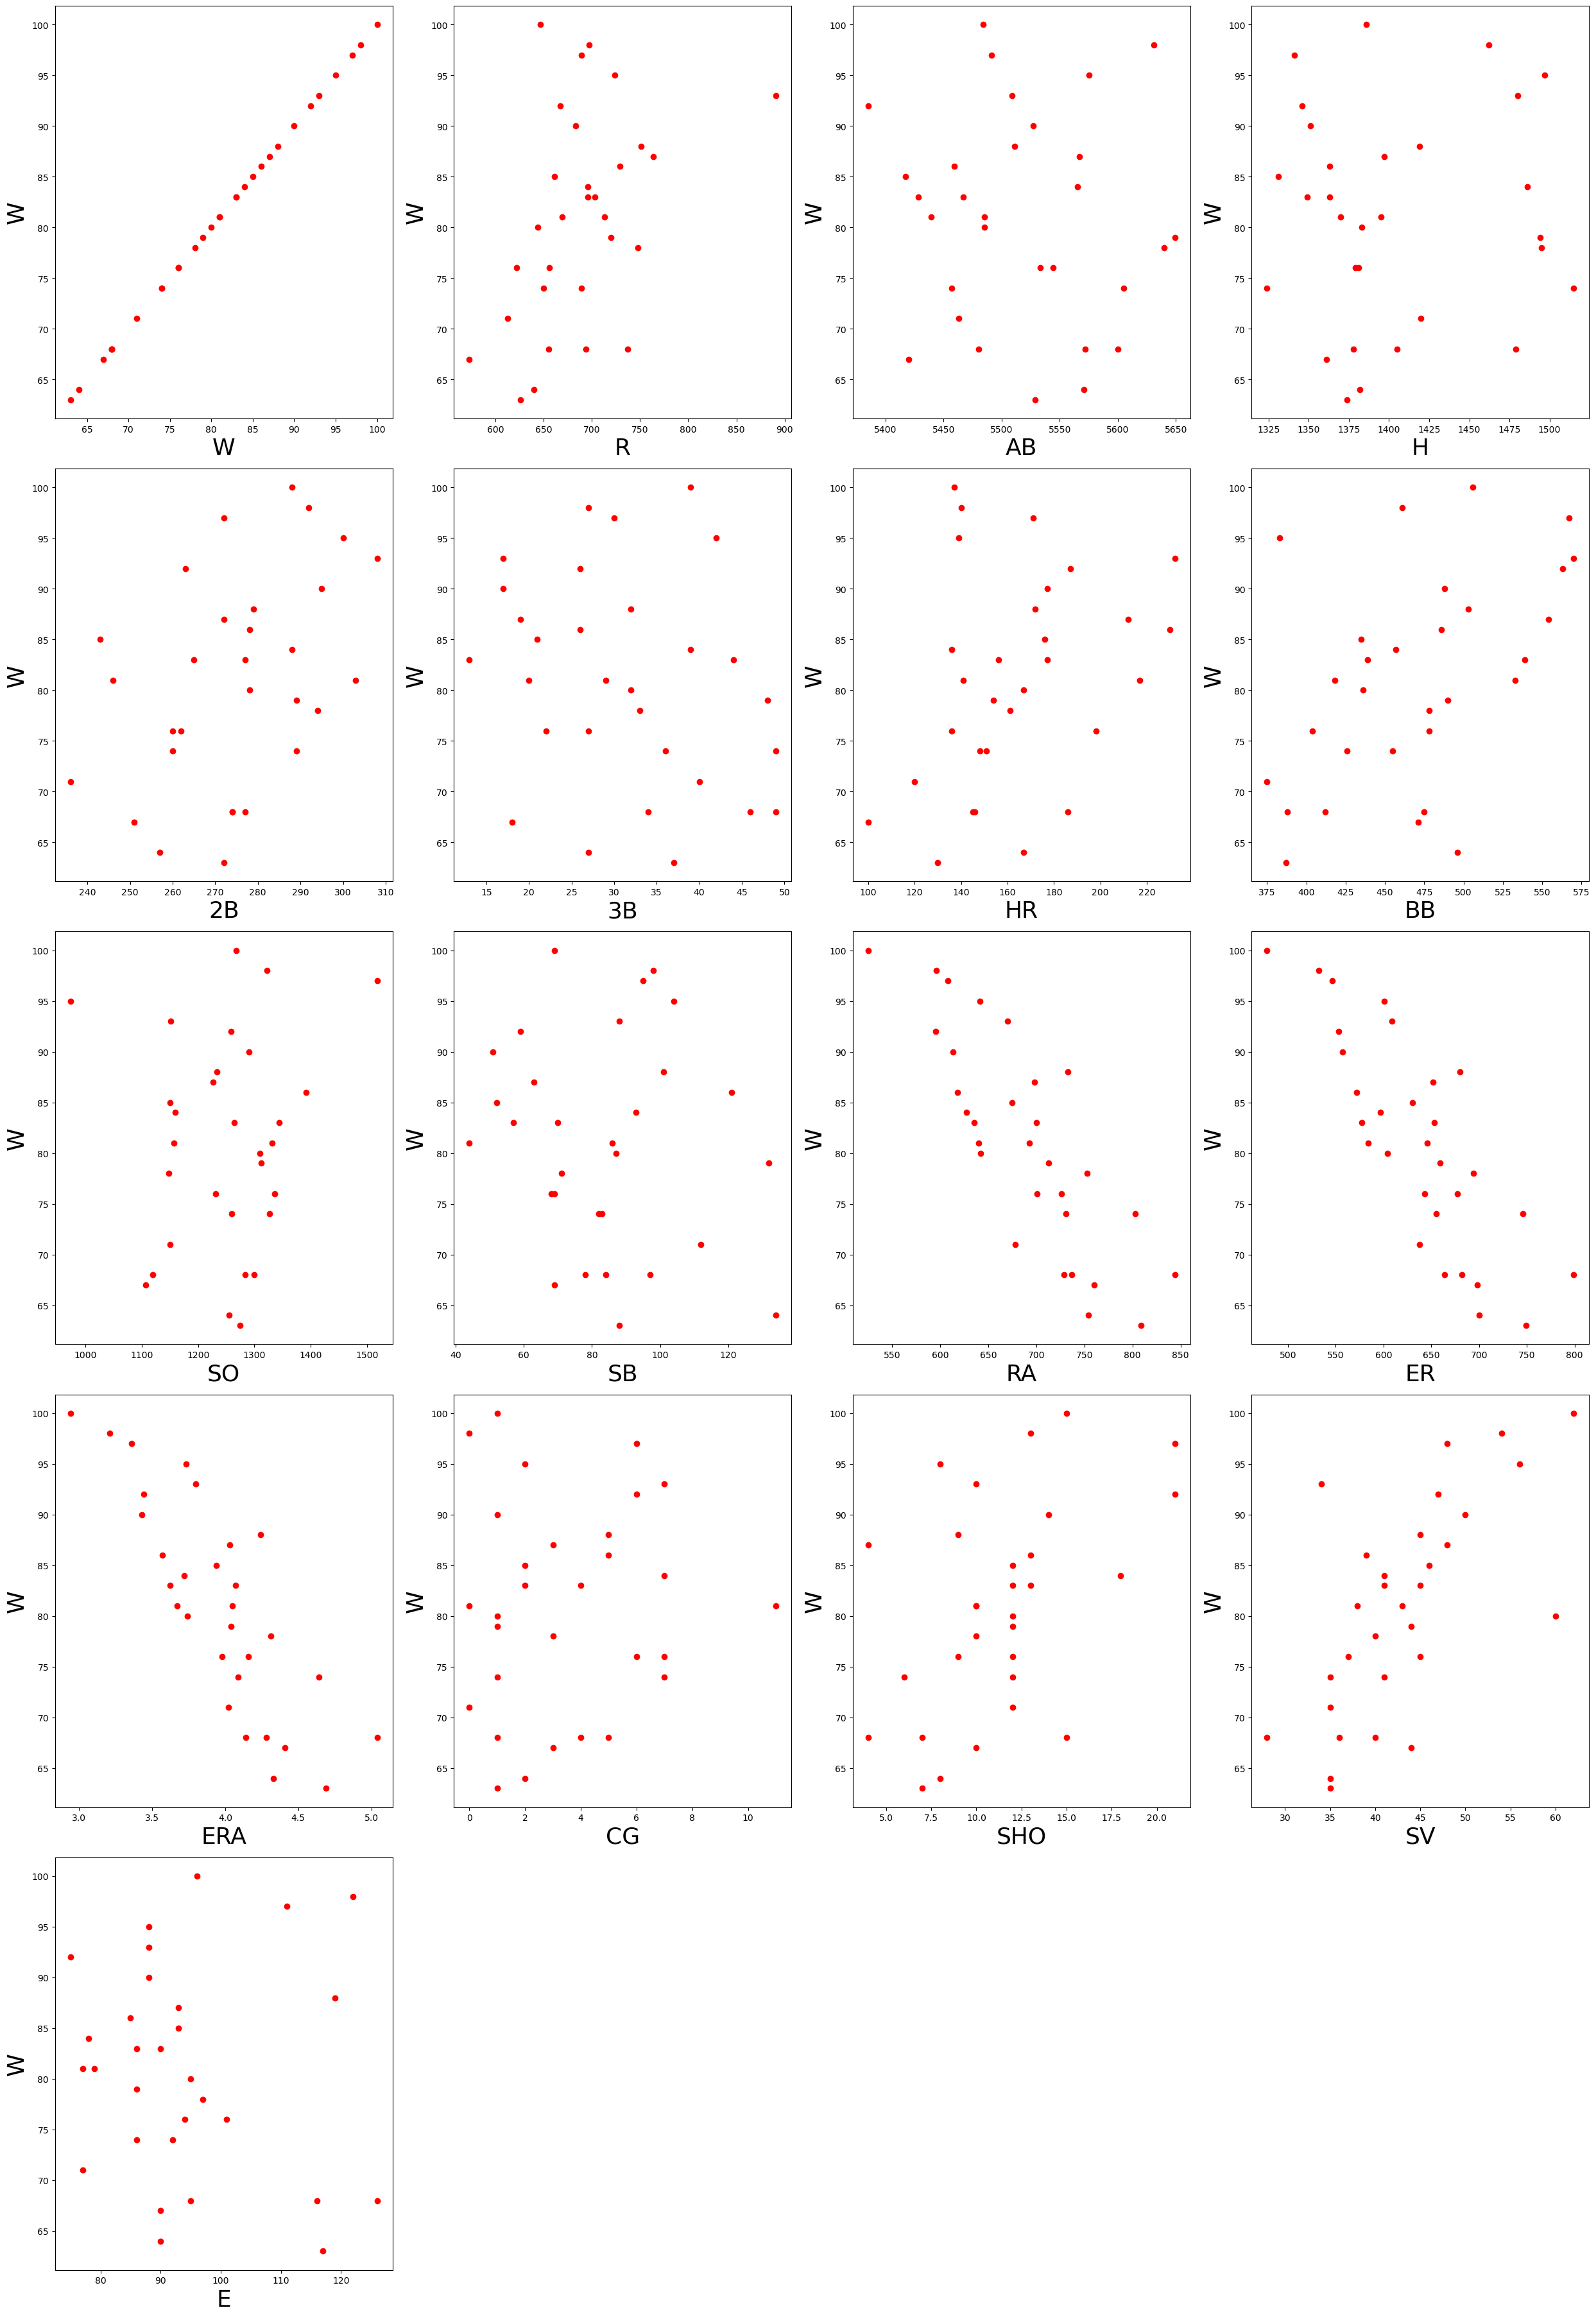

In [28]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        ax = plt.subplot(7,4,plotnumber)
        plt.scatter(df[column],df['W'], color='r')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('W', fontsize=26)
    plotnumber += 1
plt.tight_layout()
    

As, we can see in plot SV,ERA,SHO and R is having almost linear relationship with target variable and other variables are having non linear relation ship with target variable.

<Figure size 2500x2000 with 0 Axes>

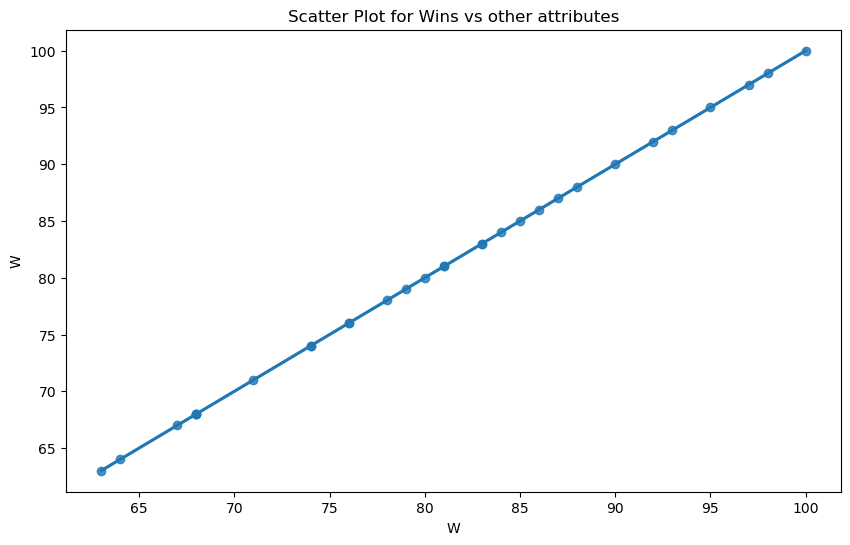

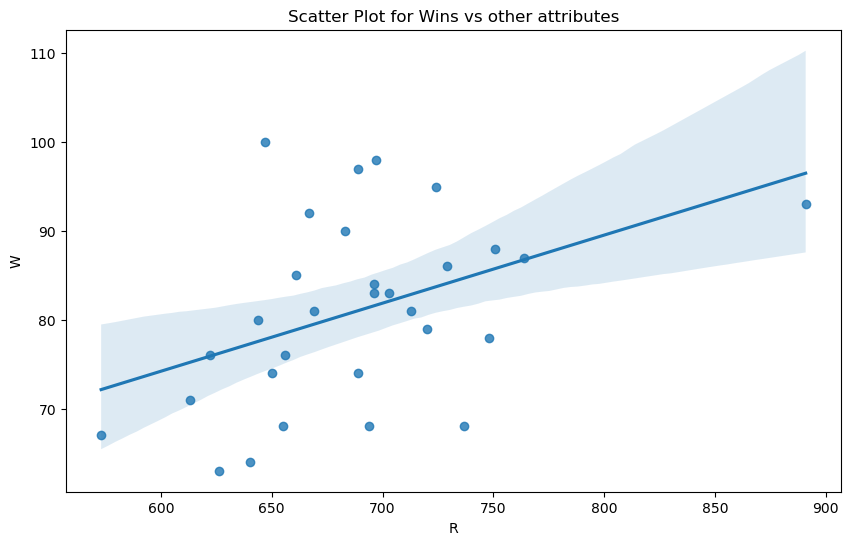

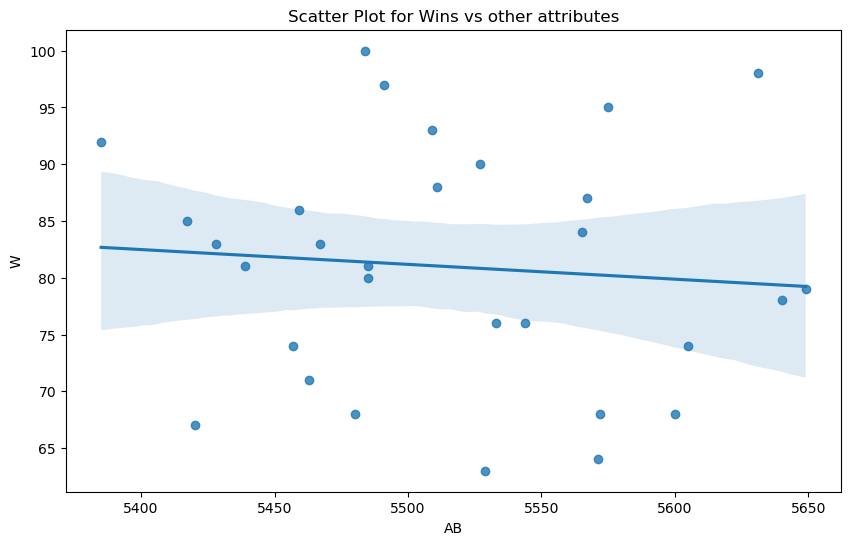

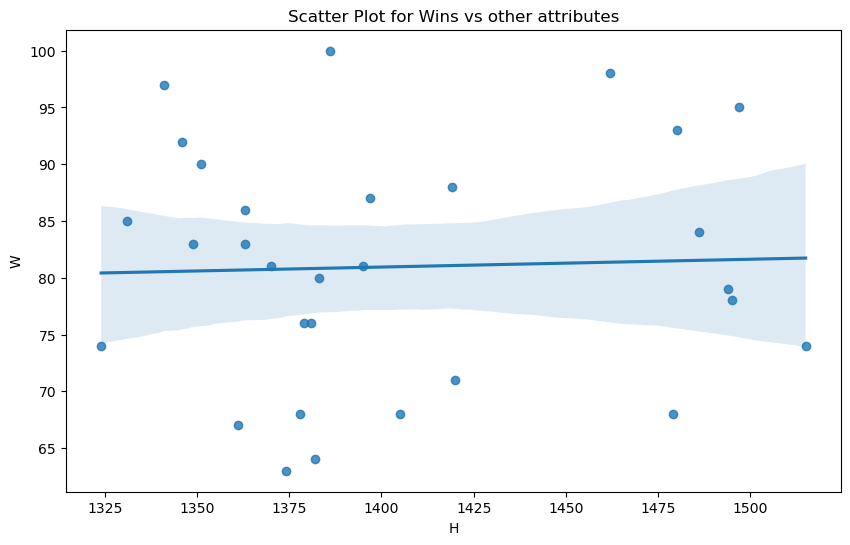

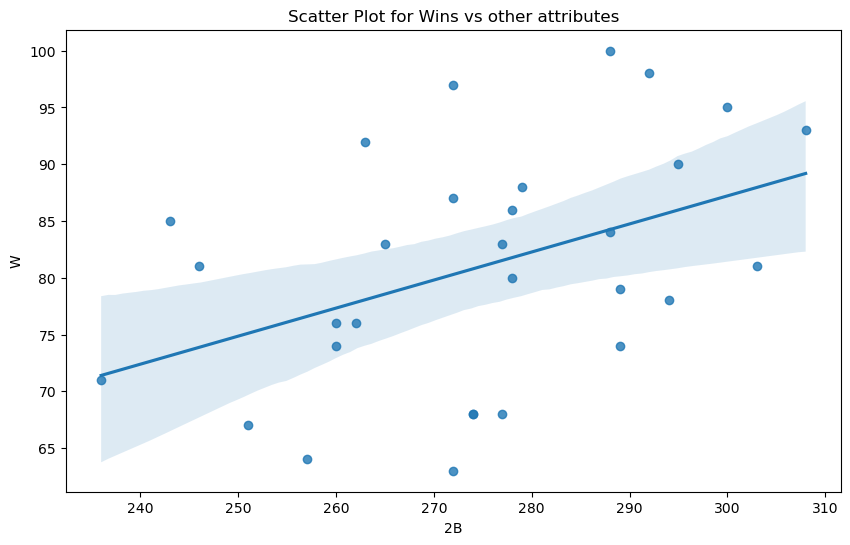

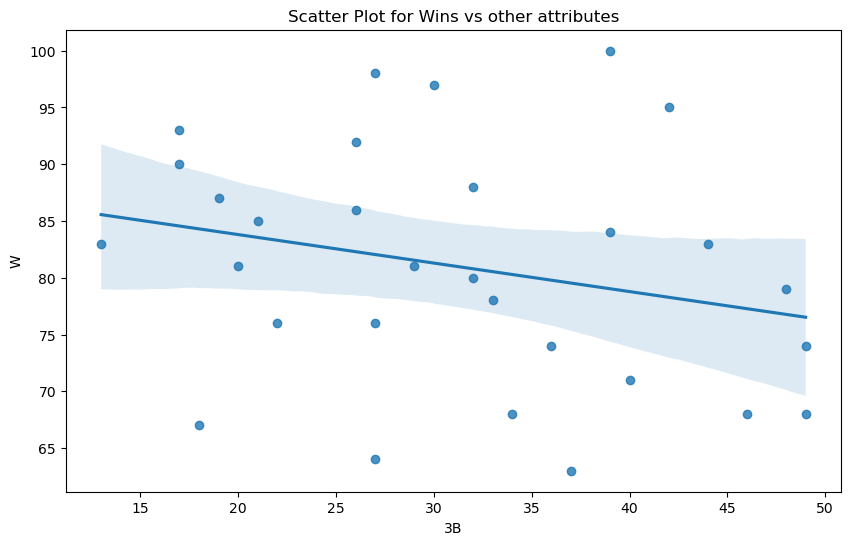

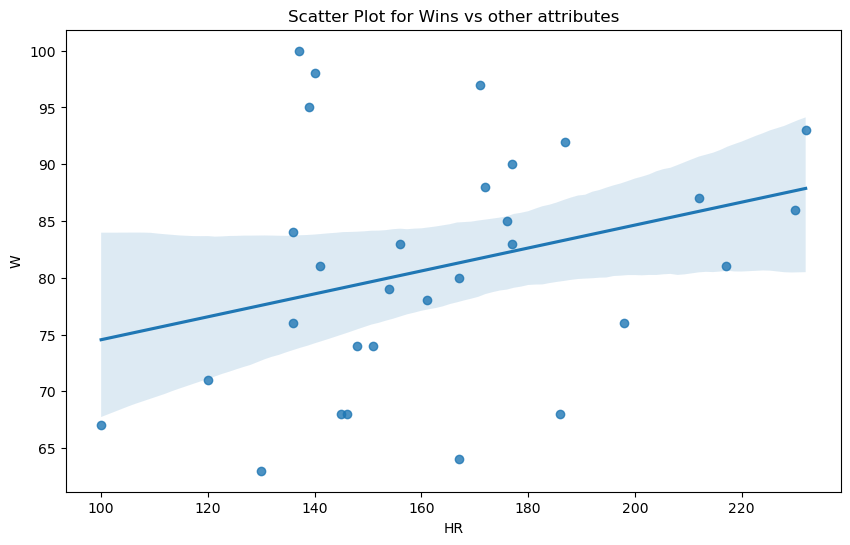

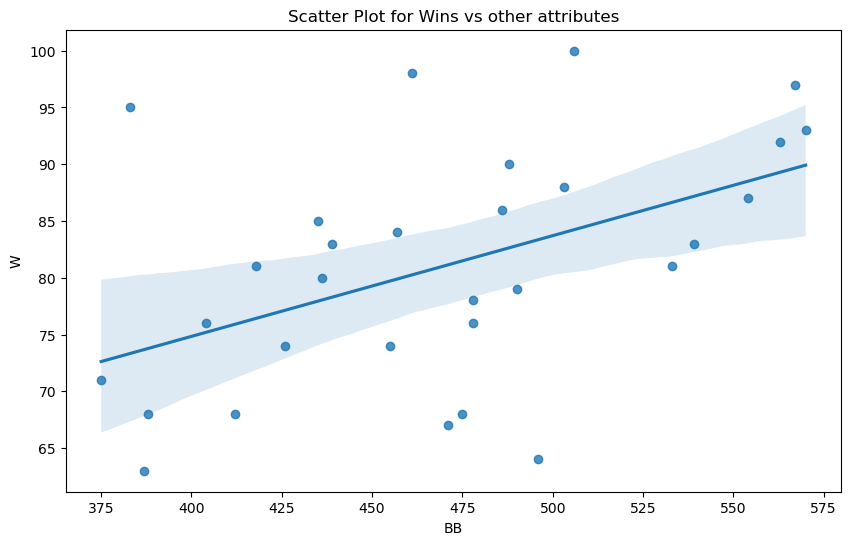

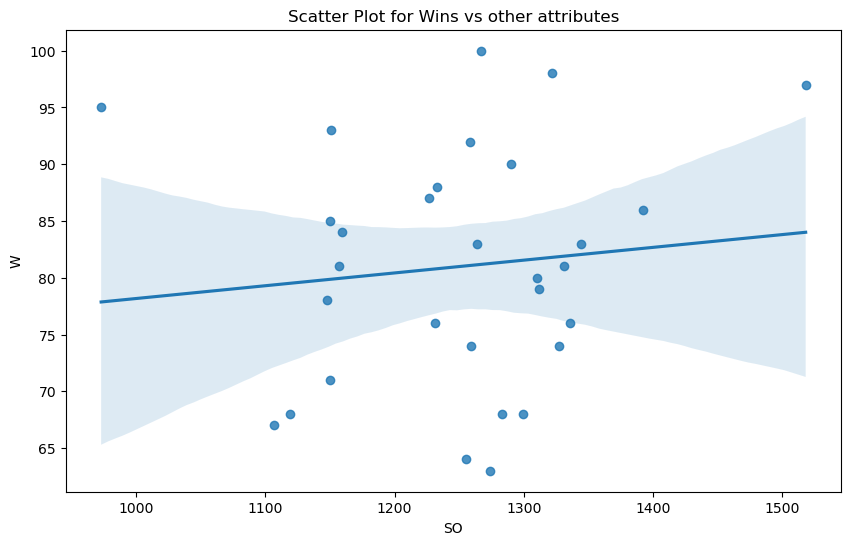

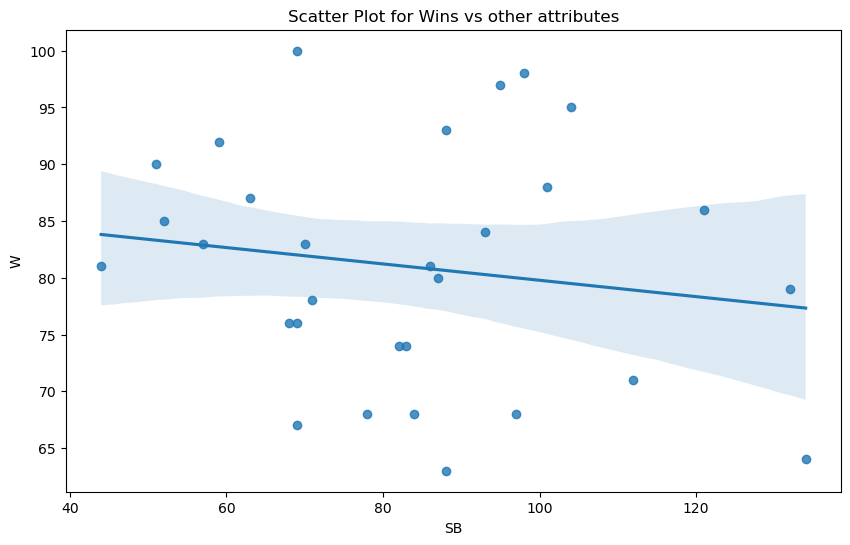

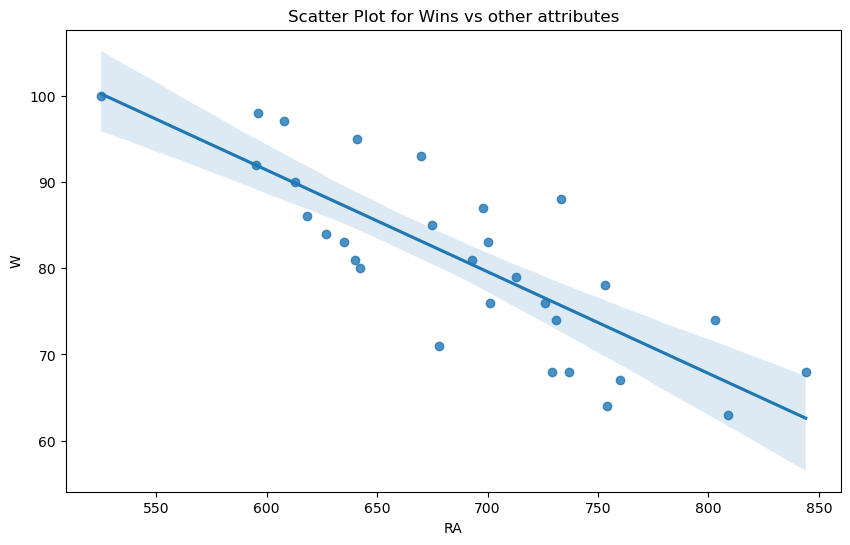

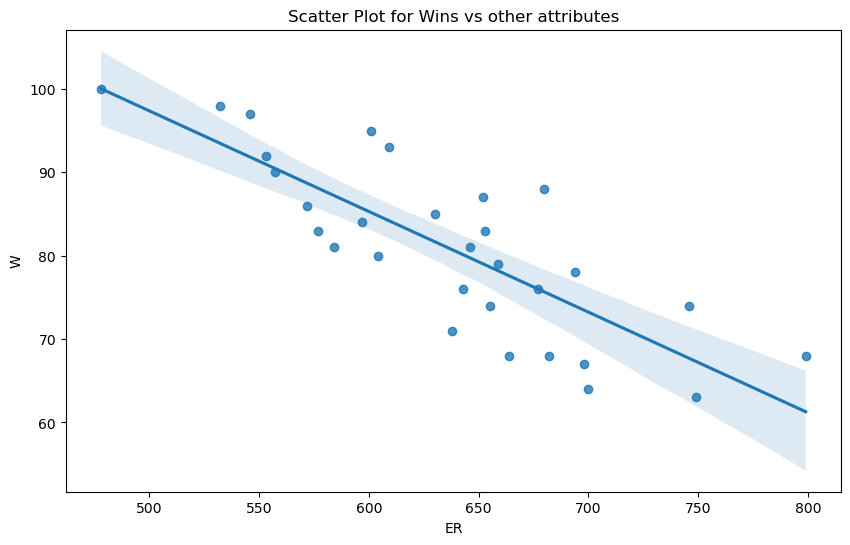

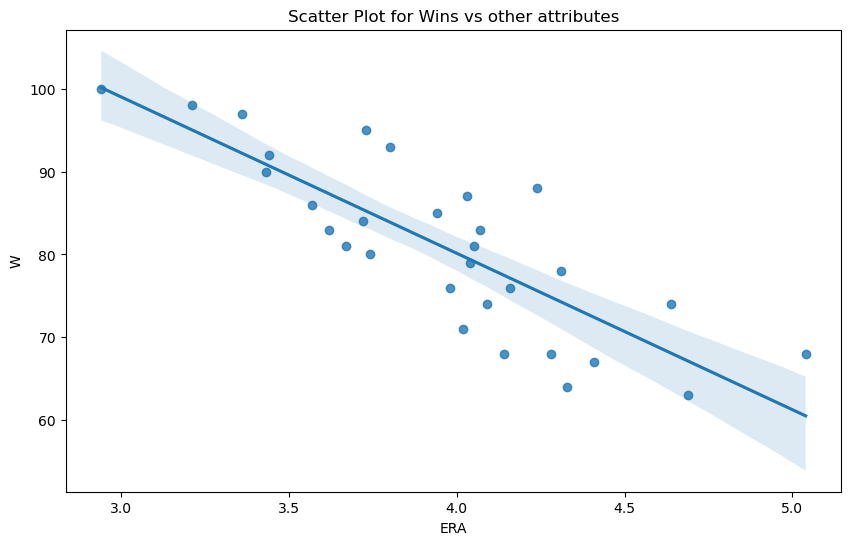

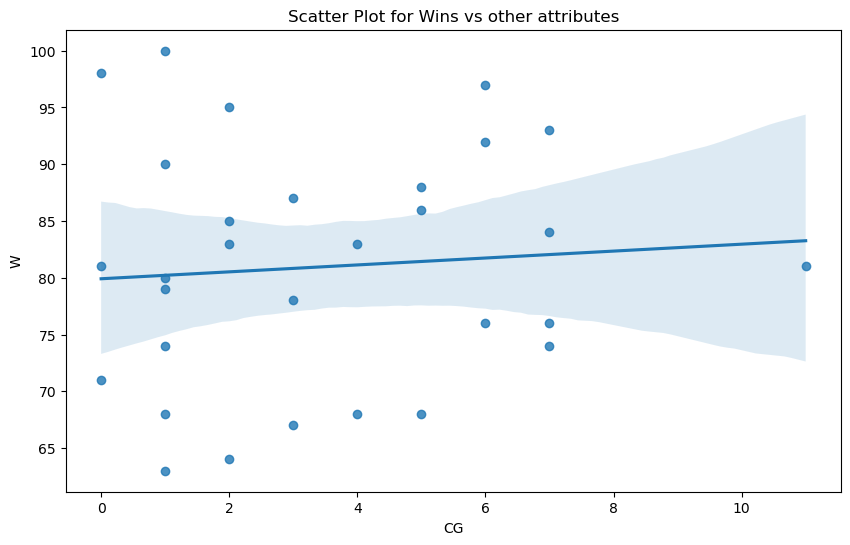

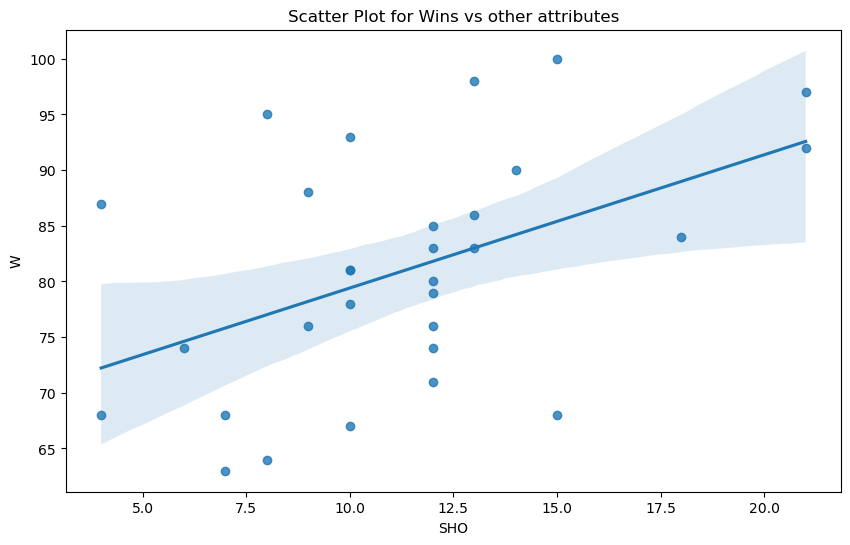

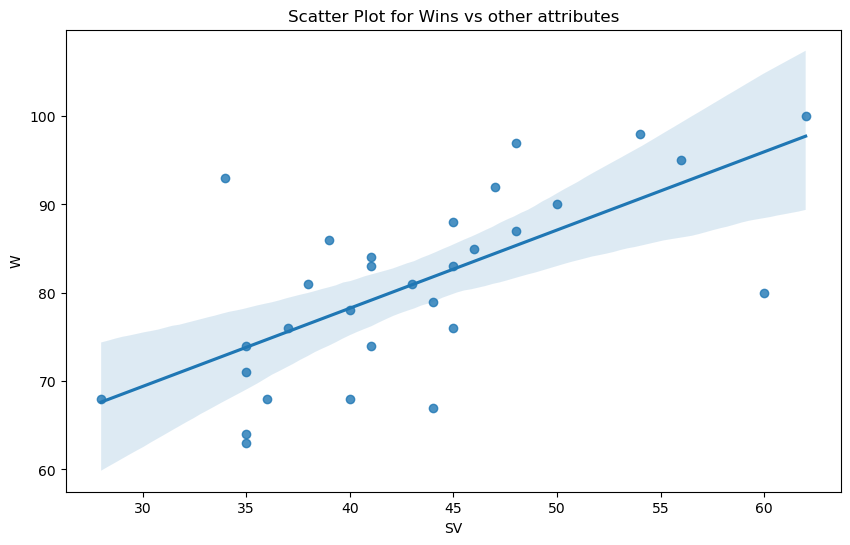

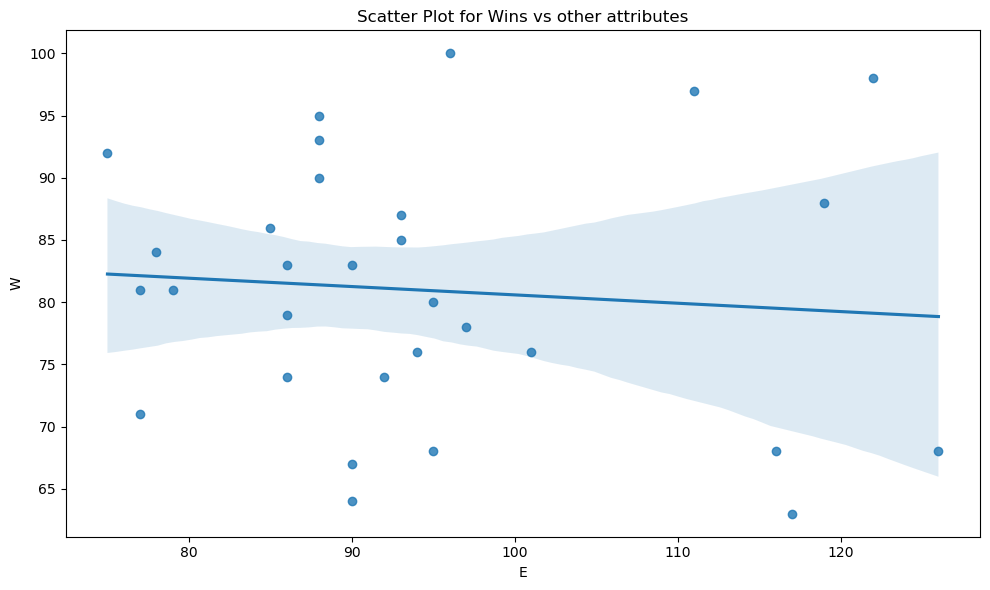

In [29]:
plt.figure(figsize = (25,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        plt.figure(figsize = (10,6))
        sns.regplot(df[column], df['W'])
        plt.title('Scatter Plot for Wins vs other attributes')
        plt.xlabel(column)
        plt.ylabel('W')
        
plt.tight_layout()

RA,ER,ERA have good relation with Win. Reset all the Columns does not good Relation with Win because data is scatter across all the places.

# Multivariate Analysis:

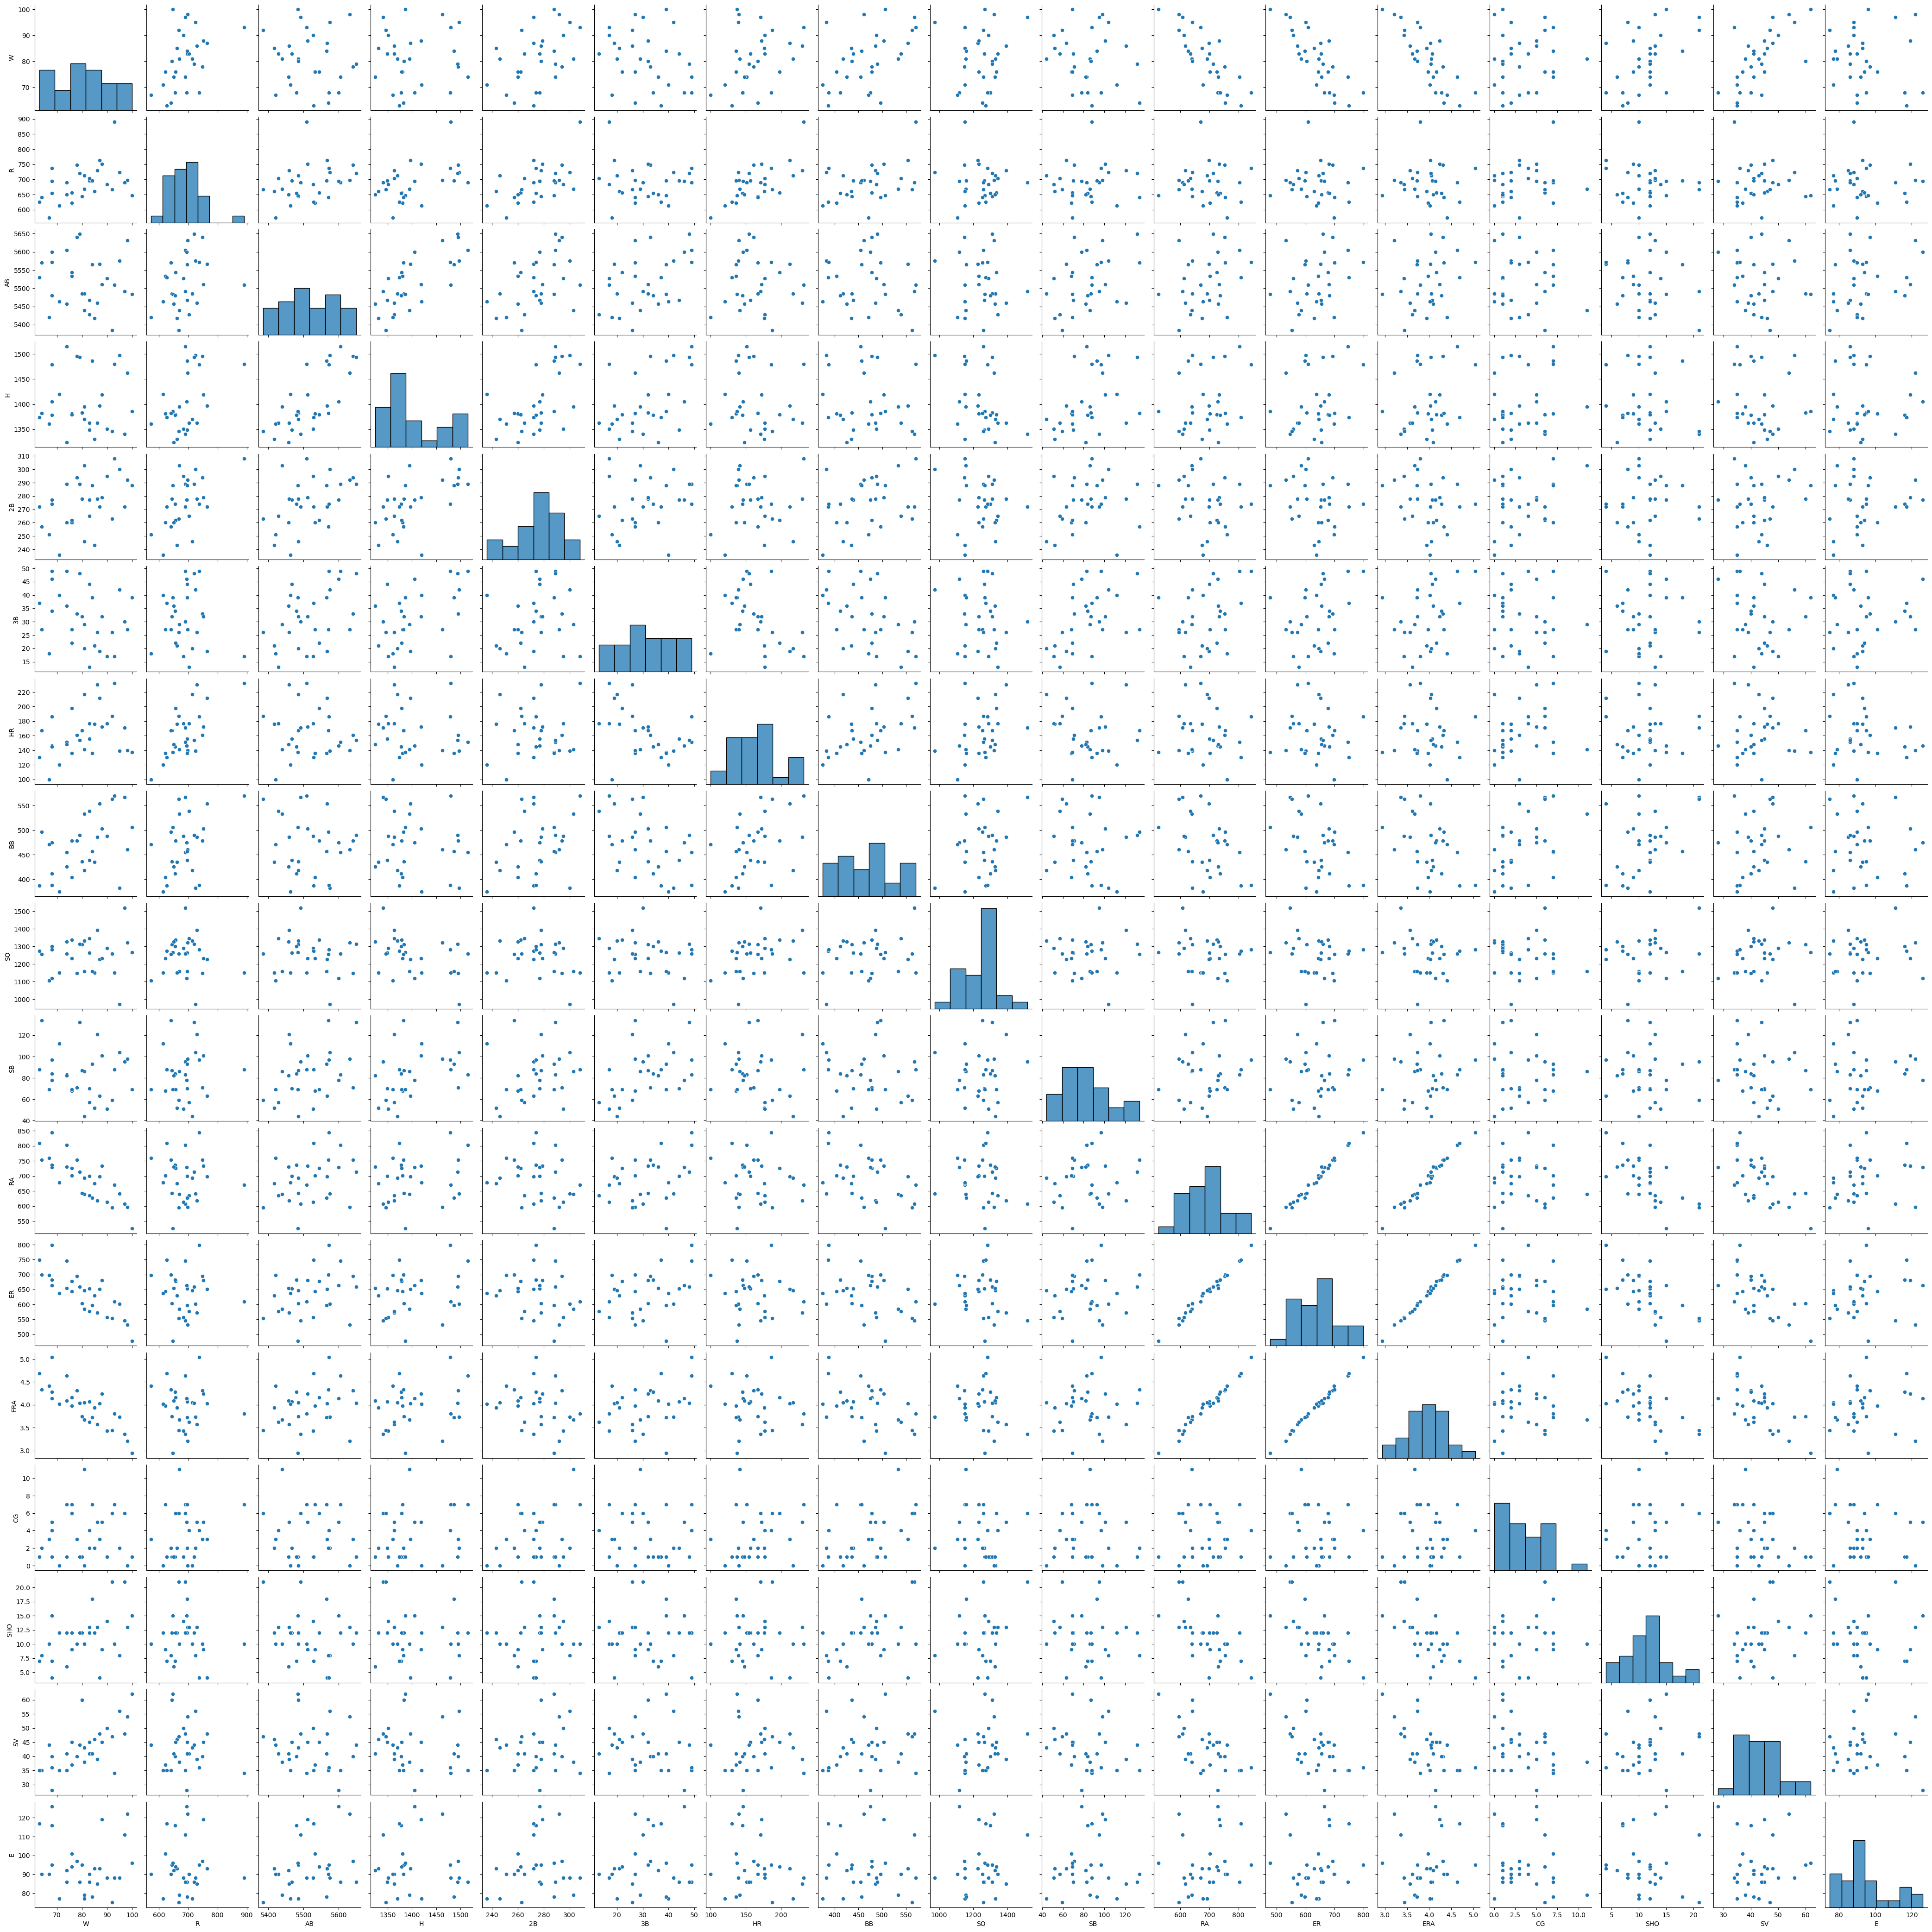

In [32]:
sns.pairplot(df)
plt.show()

The pair plots for each feature pair allow me to discern if there's a strong correlation between them or if the data points are merely dispersed without any discernible pattern.

# Heatmap:

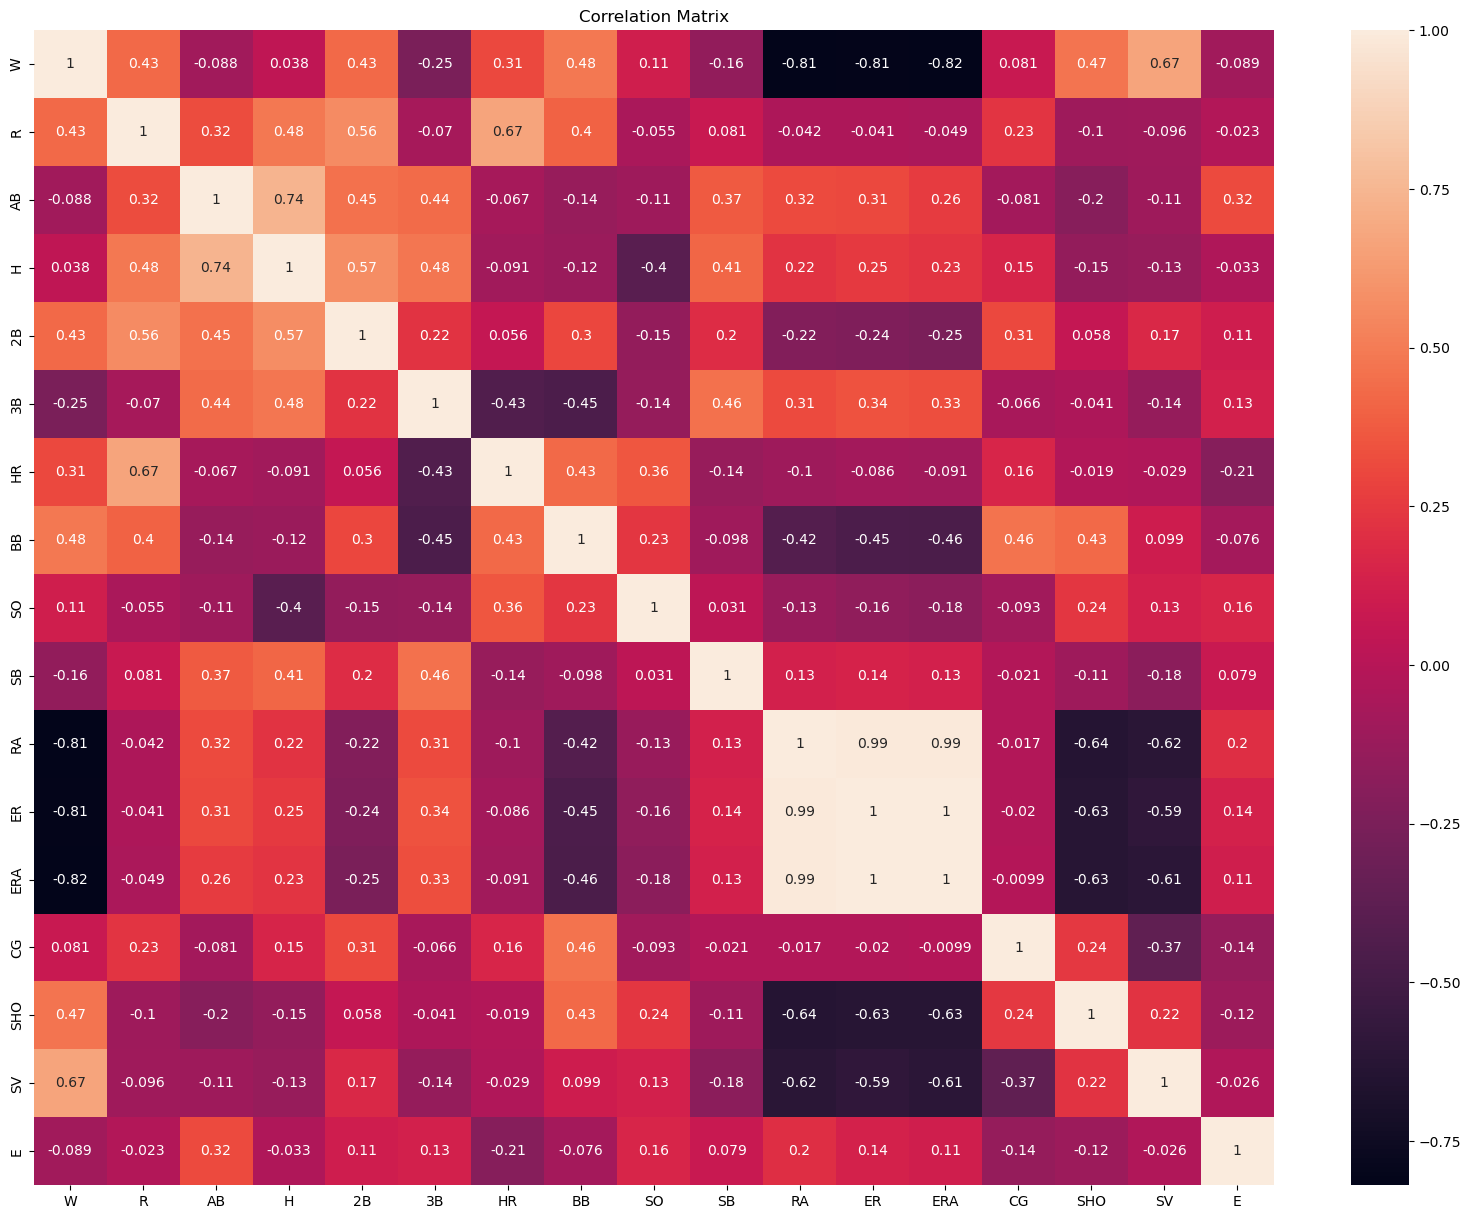

In [33]:
plt.figure(figsize = [20, 15])
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

The chart indicates a mild correlation between most of the features. However, the columns RA, ER, and ERA exhibit a strong correlation with each other. These columns also show a significant negative correlation with the Wins (W) column, implying that they greatly influence the winning outcome. To avoid redundancy in our prediction model due to the similar impact of these columns on wins, we are retaining only the ERA column and discarding the ER and RA columns. This decision will not compromise the performance of our prediction model. 

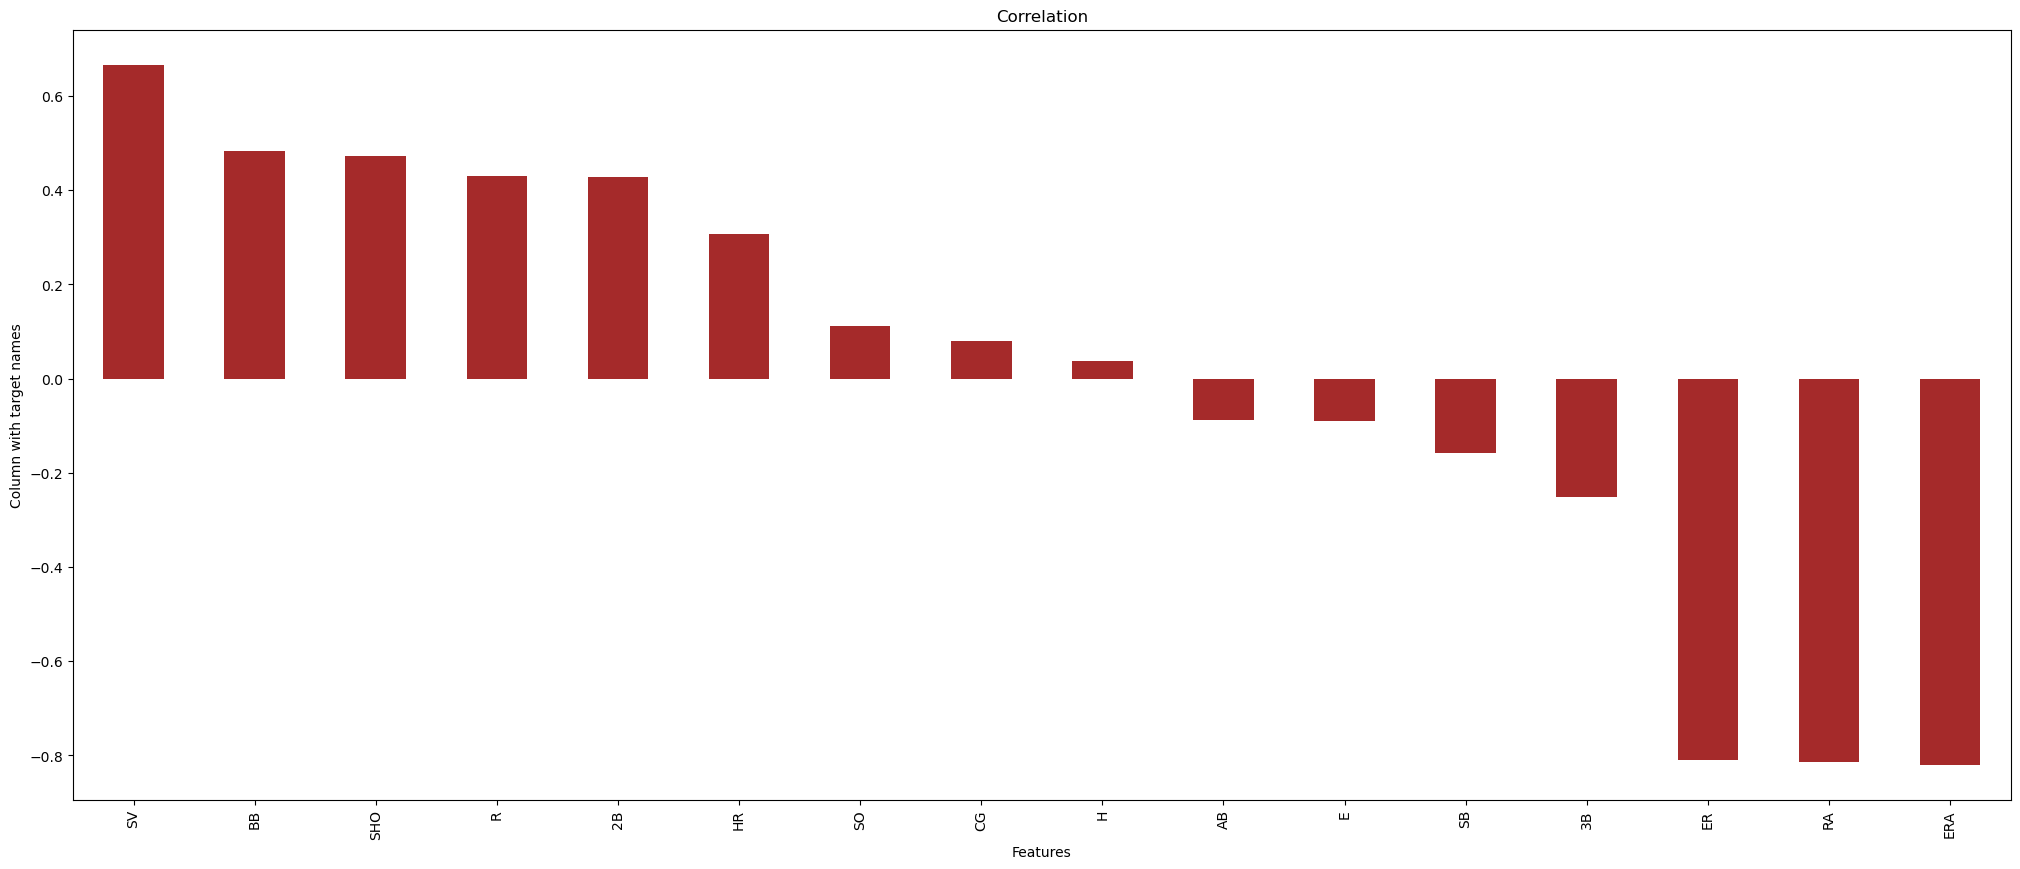

In [35]:
plt.figure(figsize =(25, 10))
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind ='bar', color ='brown')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

The correlation matrix and graph reveal that ER, RA, and ERA are most strongly, albeit negatively, correlated with wins.

On the other hand, SV shows the highest positive correlation of 0.67 with wins, followed by BB, SHO, R, and 2B, all of which have correlations above 0.4.

Interestingly, despite their strong negative correlation with wins, ER, RA, and ERA exhibit the highest correlation among themselves, exceeding 0.99.

# Data Cleaning:

In [36]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

I can see there are no null values.

# Checking for Outliers:

<AxesSubplot:>

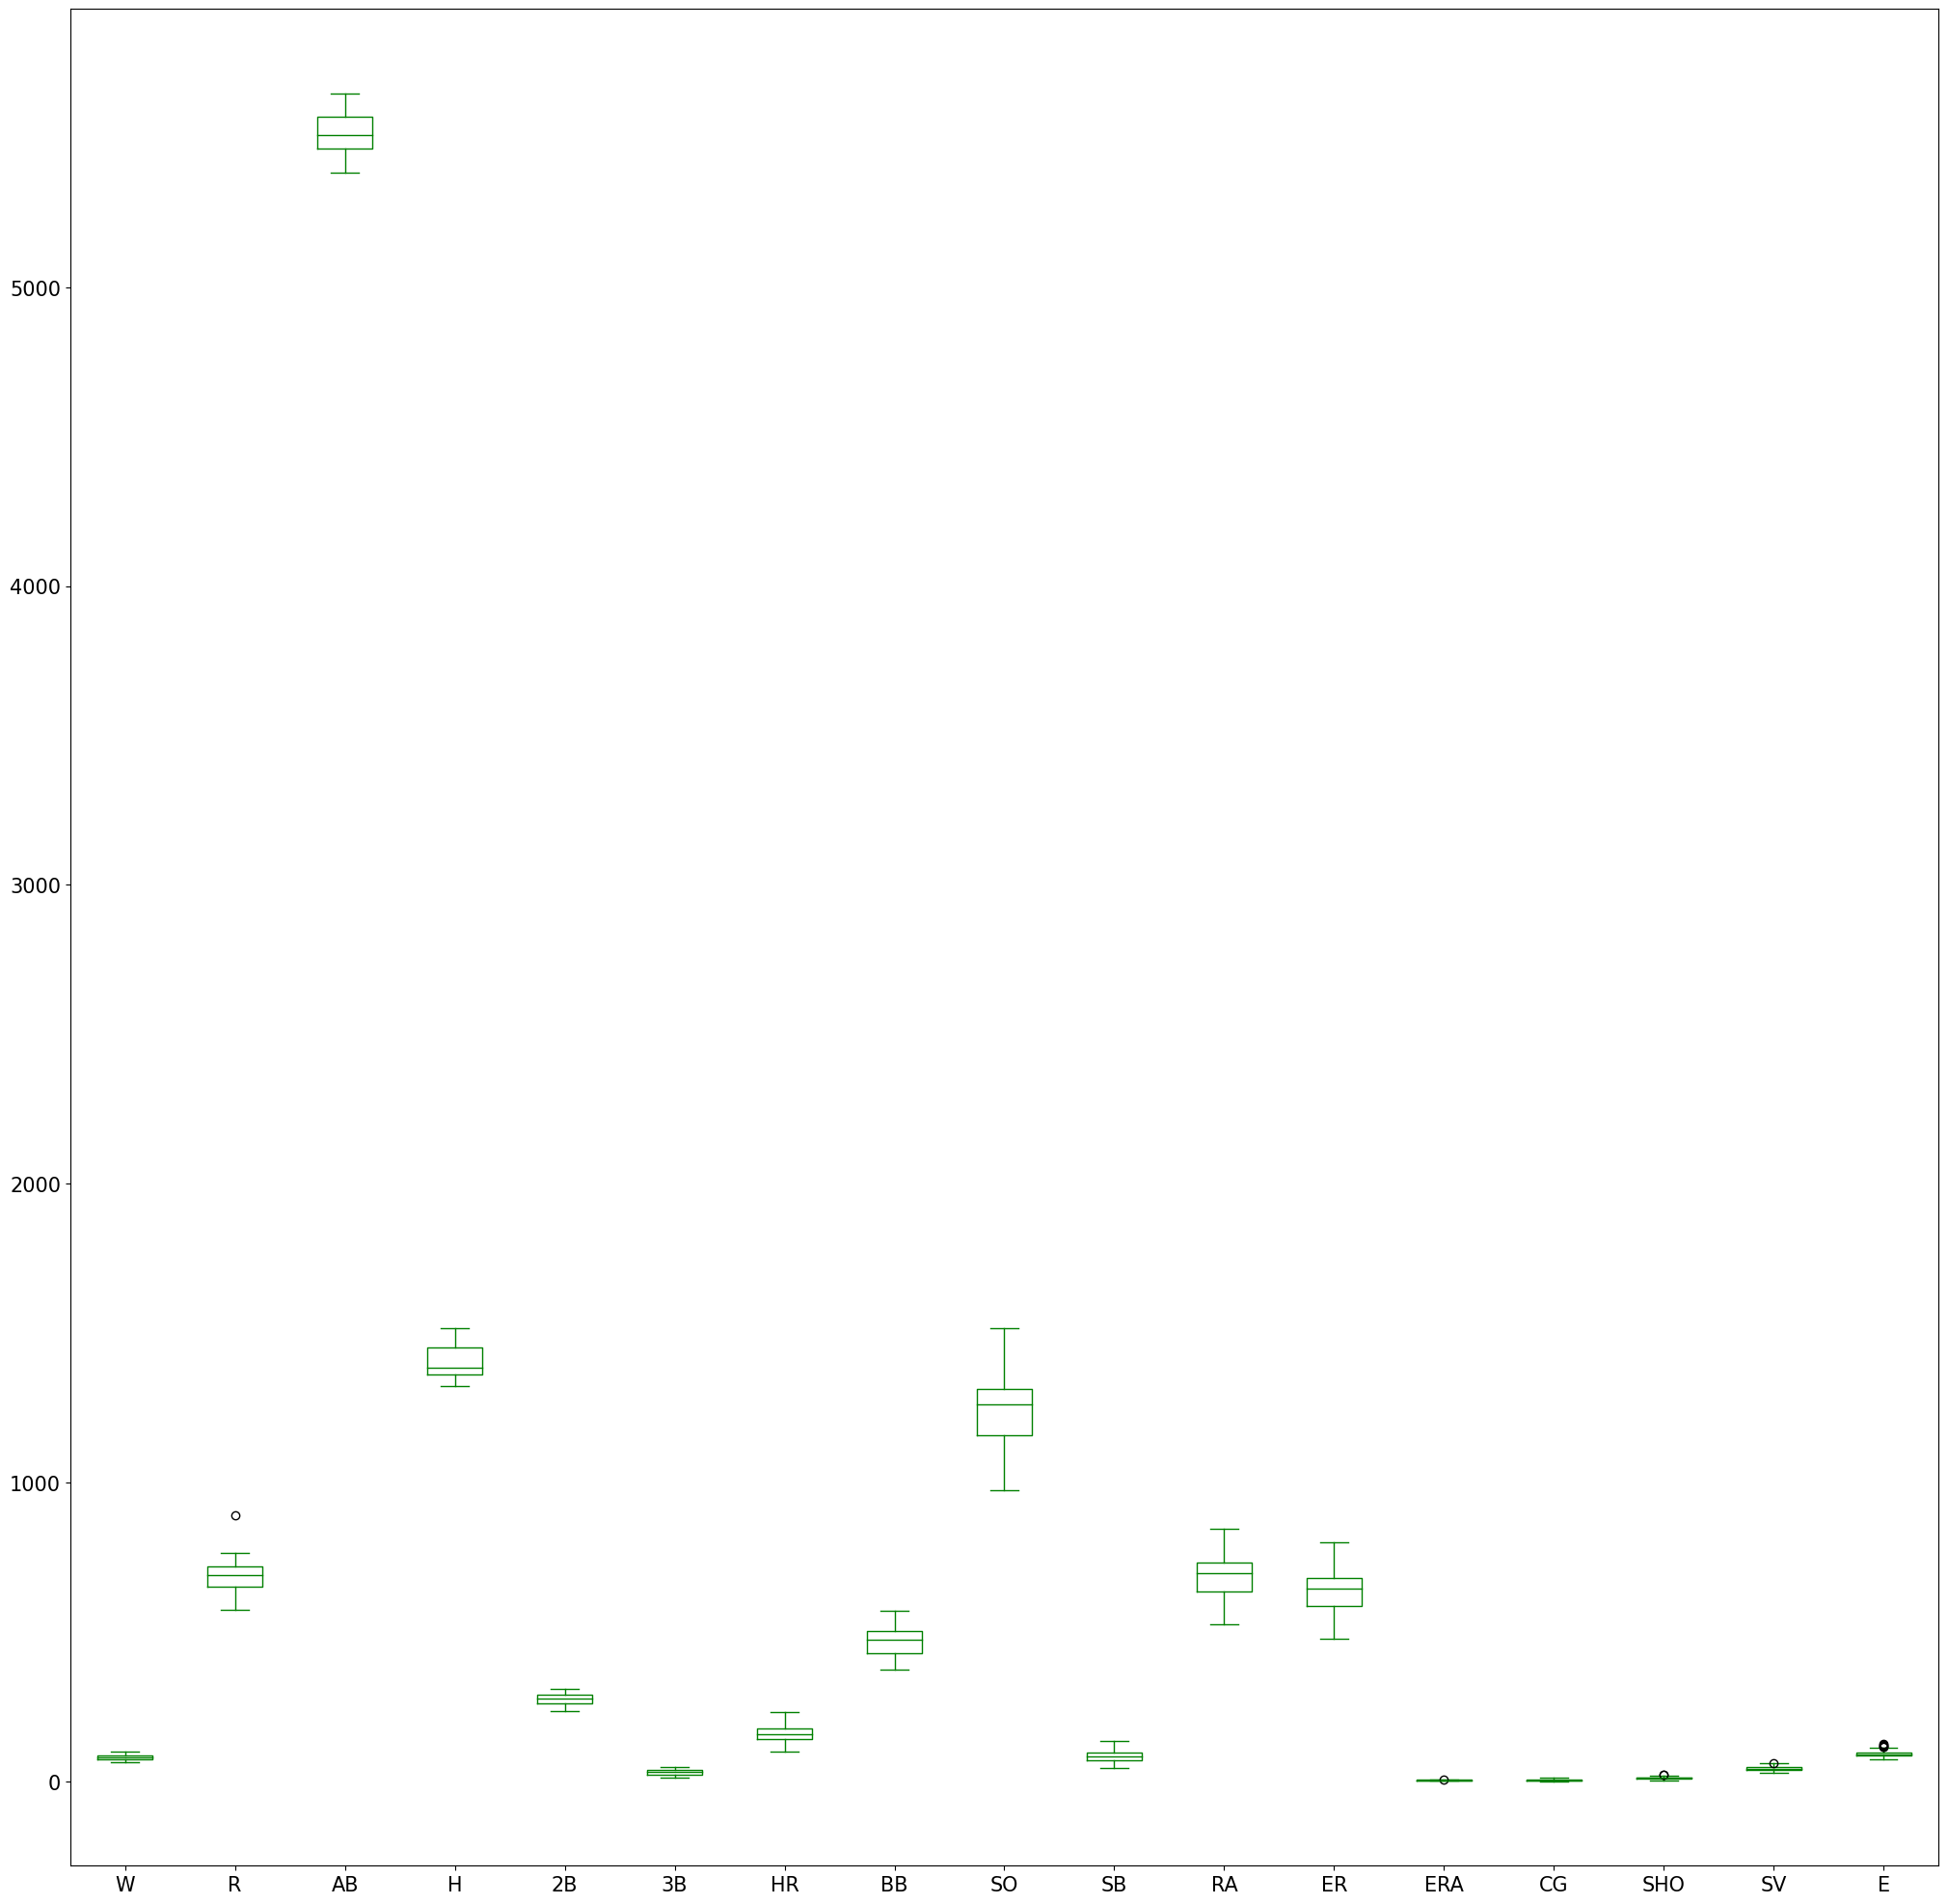

In [38]:
df.plot(kind='box',fontsize=15,figsize=(25,25),color='g')

Upon observation the box plot, it's evident that the features R-Runs, ERA-Earned Run Average, SHO-Shutout, SV-Saves, and E-Errors contain outliers.

# Removing Outliers:

# Zscore method:

In [39]:
#Features having outliers
features=df[['R','ERA','SHO','SV','E']]

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


So, we have removed outliers by using Zscore.

In [41]:
df_new.shape

(29, 17)

In [42]:
df.shape

(30, 17)

In [43]:
Dataloss = (((30-29)/30)*100)

In [44]:
Dataloss

3.3333333333333335

From my observations, the z-score method, after outlier removal, results in a data loss of 3.33%, which is comfortably below the 10% threshold.

# Checking for Skewness:

In [45]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

WE can see that there is skewness in Hits(H),Completed games(CG),Shoutouts(SHO),Saves(SV),Errors(E).

# Removing Skewness:

In [46]:
skew_features=["H","CG","SHO","SV","E"]

In [47]:
df_new["H"]=np.log1p(df_new["H"])

In [48]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

We have removed the skewness in E by using yeo-johnson method.

In [49]:
df_new[['E','SHO','SV','CG']] = scaler.fit_transform(df_new[['E','SHO','SV','CG']].values)

In [50]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

After trying to remove skewness in H using yeo-johnson method we got 0.0 skewness.

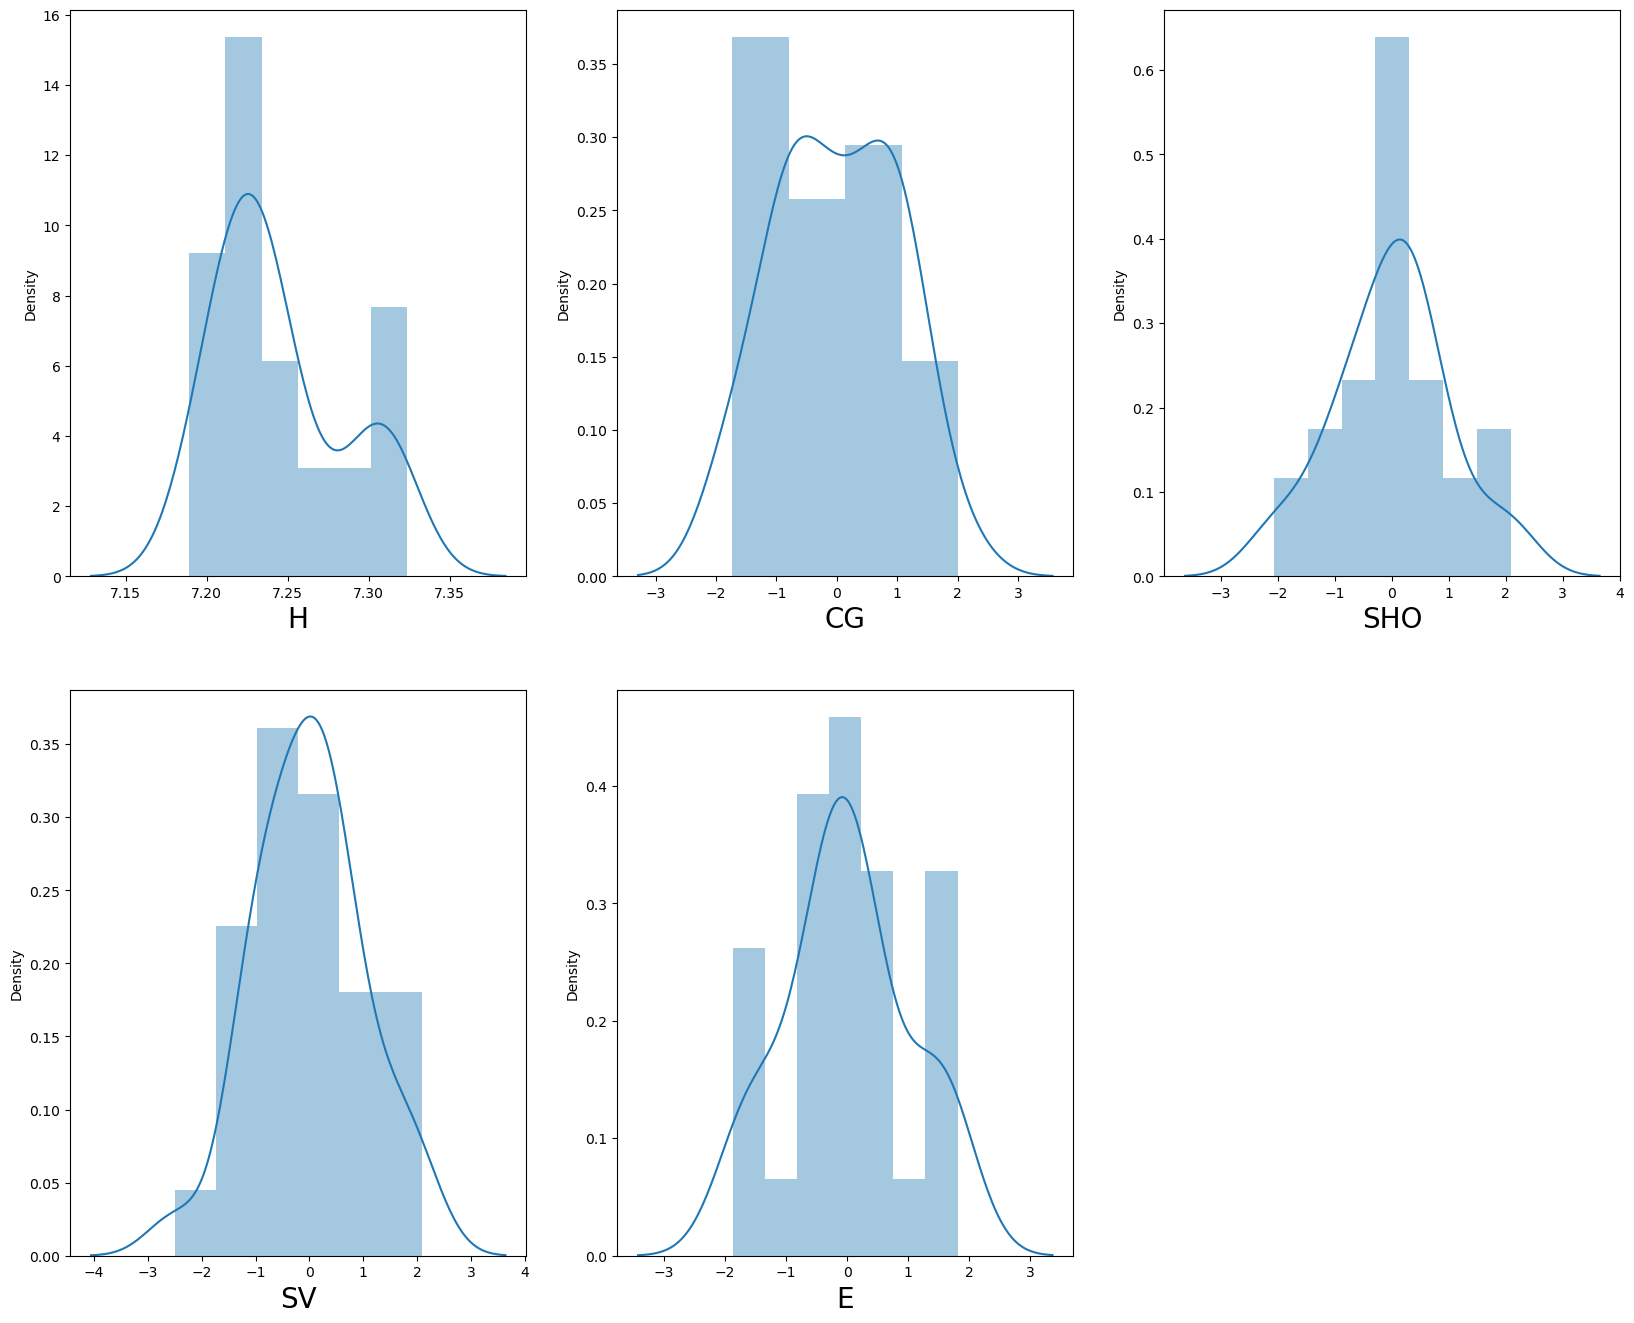

In [51]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new[skew_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

By looking at the graph we can say that skewness is removed.

# Splitting the columns:

In [66]:
x = df_new.drop("W",axis=1)
y = df_new["W"]

x=Feature 
y=Target

# Scaling Data using StandardScaler:

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [79]:
ssc=StandardScaler()
X = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [80]:
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.264463,0.236737,-1.149165,-0.540820


# Variance inflation factor:

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,7.112342,R
1,20.237195,AB
2,10.114607,H
3,3.528059,2B
4,3.227808,3B
5,8.736960,HR
6,3.324550,BB
7,2.811546,SO
8,1.955254,SB
9,200.826177,RA


Based on the VIF values, it's clear that there's multicollinearity between the RA, ER and ERA variables. To mitigate this, We'll remove the RA and ER columns.

In [82]:
#Droping ER
X = X.drop(["ER"],axis=1)

In [83]:
X.head(10)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.496876,1.264463,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.051906,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.150677,0.121871,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-0.553131,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.194815,-1.732896,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,-0.310580,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.489319,-0.870682,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.689389,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.768604,0.121871,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.349394,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.614123,0.770649,-0.513555,0.312020,1.554265


we can observe Dependent variables after removing multicolinearity.

In [84]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,6.069116,R
1,7.791456,AB
2,9.340727,H
3,3.227862,2B
4,3.125190,3B
5,7.474108,HR
6,3.323583,BB
7,2.786186,SO
8,1.787493,SB
9,142.535647,RA


Still VIF is high for 2 columns so let me drop ERA.

In [85]:
#Droping RA
X = X.drop(["ERA"],axis=1)

In [86]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,6.019438,R
1,5.210230,AB
2,7.728111,H
3,3.165732,2B
4,2.981242,3B
5,6.168639,HR
6,3.053363,BB
7,2.287734,SO
8,1.773119,SB
9,4.759240,RA


Multicolinearity issue is solved.

# Splitting the data for training and testing:

In [58]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Let find the best random state:

In [61]:
from sklearn.linear_model import  LinearRegression

LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state{i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state{i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state0, The training accuracy is :-0.9768383015216393
At random state0, The test accuracy is :-0.49963681285927775


At random state1, The training accuracy is :-0.9762285427209911
At random state1, The test accuracy is :-0.18565756675520972


At random state2, The training accuracy is :-0.9638255316870868
At random state2, The test accuracy is :--0.2679901647388272


At random state3, The training accuracy is :-0.9677990948927815
At random state3, The test accuracy is :-0.6776697786661834


At random state4, The training accuracy is :-0.9680569379679669
At random state4, The test accuracy is :-0.7641316816583286


At random state5, The training accuracy is :-0.9612472010423034
At random state5, The test accuracy is :-0.6051495407609396


At random state6, The training accuracy is :-0.9723763056746941
At random state6, The test accuracy is :-0.7504731543294726


At random state7, The training accuracy is :-0.9610245315460946
At random state7, The test accuracy is :-0.31669541

I can see random state=99 giving highest accuracy,choosing that as random state.

In [62]:
#Splitting the data into 78% training and 22% testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=99)

In [63]:
x_train.shape

(22, 16)

In [64]:
y_train.shape

(22,)

In [65]:
x_test.shape

(7, 16)

In [66]:
y_test.shape

(7,)

# Model Building:

# Regression Algorithms:

In [68]:
#Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

# 1)Linear Regression:

In [69]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.9633011594527375


In [70]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 27.077878720331576
MAE: 4.999072397573668
r2_score: 0.870272379874153


LR is giving me 88% r2_score.

# 2)SGD:

In [71]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mae:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: -2.042267860265918e+30
mae: 2.7708156602138423e+32
mae: 1.6641490883524978e+16
rmse: 1.6645767210356638e+16


SGD is giving me 90% r2_score.

# 3)Lasso Regressor:

In [80]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(x_train,y_train)
print(Z.best_params_)

{'alpha': 10, 'random_state': 0}


In [81]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8162585359689928
mse: 24.928841895472164
mae: 4.824282278813735
rmse: 4.992879118852384


Lasso is giving me 90%r2_score.

# 4)Ridge Regressor:

In [83]:
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

{'alpha': 10, 'solver': 'saga'}


In [84]:
rd=Ridge(alpha=10,solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8412293076862607
mse: 21.540970663300794
mae: 4.3822306255797026
rmse: 4.64122512525527


Ridge is giving 76%r2_score.

# Cross Validation:

In [88]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model,x,y):
    rmse =-(cross_val_score(model,x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)

models = [LinearRegression(),
         Ridge(),
         SVR(kernel='linear'),
         SVR(kernel='poly'),
         SVR(kernel='rbf'),
         RandomForestRegressor(),
         DecisionTreeRegressor(),
         GradientBoostingRegressor(),]

names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}   : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR   : 33.227142, 22.206678
R   : 32.549049, 32.609656
svr   : 54.292689, 31.284378
svr_p   : 111.891643, 79.768934
svr_r   : 112.275451, 79.777668
RF   : 39.864027, 24.023091
DTR   : 70.216667, 45.490539
GBR   : 47.569624, 31.099844


According to all metrics score selecting the linearRegression as final model

# Hyper Parameter Tuning:

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
parameter = {'alpha':[0.01,0.1,1.0,10.26],
            'selection':['cyclic','random'],
            'max_iter':[2,4,6,8,10],
            'tol':[100,1000],
            'fit_intercept':['bool']}

In [91]:
GVC=GridSearchCV(Lasso(),parameter,cv=5)

In [92]:
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.26],
                         'fit_intercept': ['bool'],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]})

In [93]:
GVC.best_params_

{'alpha': 0.1,
 'fit_intercept': 'bool',
 'max_iter': 2,
 'selection': 'random',
 'tol': 1000}

we can see best parameters.

In [94]:
Final_mod=Lasso(alpha=1.0, fit_intercept="bool", max_iter=4, selection="random", tol=1000)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_Score: 79.48387716584051
mean_squared_error: 27.83493563295762
mean_absolute_error: 4.3354552220416105
RMSE value: 5.275882450638719


After tuning we got 79.48% accuracy which is good.

# Saving the model:

In [95]:
import joblib
joblib.dump(Final_mod,"BaseBallCaseStudy.pkl")

['BaseBallCaseStudy.pkl']

# Predictions:

In [97]:
model=joblib.load("BaseballCaseStudy.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([69.58640733, 67.11525668, 85.45311838, 79.89227939, 85.81429738,
       88.93161129, 83.67532456])

In [98]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6
Predicted,69.586407,67.115257,85.453118,79.892279,85.814297,88.931611,83.675325
Original,67.000000,63.000000,97.000000,76.000000,83.000000,92.000000,86.000000
